## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [7]:
train_df = pd.read_csv('Test.csv')  
test_df = pd.read_csv('Train.csv.csv')

In [9]:
print(train_df.head())
print(test_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  4.722989  1.206140 -0.341909  ...  2.291204 -5.411388  0.870073  0.574479   
1 -4.405744 -0.332869  1.966794  ... -2.474936  2.493582  0.315165  2.059288   
2  1.347309 -1.732348  0.466500  ... -1.318888 -2.997464  0.459664  0.619774   
3  0.269493  1.322436  0.702345  ...  3.517918 -3.074085 -0.284220  0.954576   
4  0.965043  1.918379 -2.774855  ...  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.

## Data Overview

- Observations
- Sanity checks

In [11]:
train_df.shape, test_df.shape

((5000, 41), (20000, 41))

In [14]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

(None, None)

In [16]:
train_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,4995.000000,4994.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.277622,0.397928,2.551787,-0.048943,-0.080120,-1.042138,-0.907922,-0.574592,0.030121,0.018524,...,0.232567,-0.080115,-0.392663,2.211205,1.594845,0.022931,-0.405659,0.938800,-0.932406,0.056400
std,3.466280,3.139562,3.326607,3.413937,2.110870,2.005444,1.769017,3.331911,2.174139,2.145437,...,5.585628,3.538624,3.166101,2.948426,3.774970,1.785320,3.968936,1.716502,2.978193,0.230716
min,-12.381696,-10.716179,-9.237940,-14.682446,-7.711569,-8.924196,-8.124230,-12.252731,-6.785495,-8.170956,...,-17.244168,-14.903781,-14.699725,-12.260591,-12.735567,-5.079070,-15.334533,-5.451050,-10.076234,0.000000
25%,-2.743691,-1.649211,0.314931,-2.292694,-1.615238,-2.368853,-2.054259,-2.642088,-1.455712,-1.353320,...,-3.556267,-2.348121,-2.009604,0.321818,-0.866066,-1.240526,-2.984480,-0.208024,-2.986587,0.000000
50%,-0.764767,0.427369,2.260428,-0.145753,-0.131890,-1.048571,-0.939695,-0.357943,-0.079891,0.166292,...,-0.076694,-0.159713,-0.171745,2.111750,1.702964,-0.110415,-0.381162,0.959152,-1.002764,0.000000
75%,1.831313,2.444486,4.587000,2.166468,1.341197,0.307555,0.212228,1.712896,1.449548,1.511248,...,3.751857,2.099160,1.465402,4.031639,4.104409,1.237522,2.287998,2.130769,1.079738,0.000000
max,13.504352,14.079073,15.314503,12.140157,7.672835,5.067685,7.616182,10.414722,8.850720,6.598728,...,26.539391,13.323517,12.146302,13.489237,17.116122,6.809938,13.064950,7.182237,8.698460,1.000000


In [18]:
test_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


In [20]:
train_df['Target'].value_counts()

Target
0    4718
1     282
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

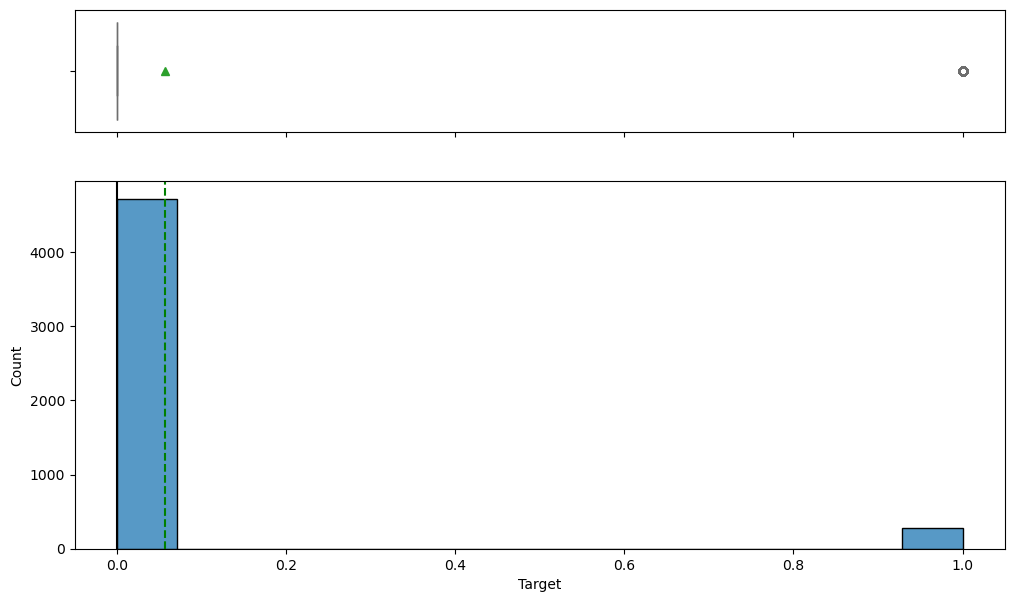

In [64]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
histogram_boxplot(data=train_df, feature='Target')

### Plotting all the features at one go

C:\Users\chedeema\AppData\Local\Temp\ipykernel_9348\2935727541.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f2, (ax_box2, ax_hist2) = plt.subplots(


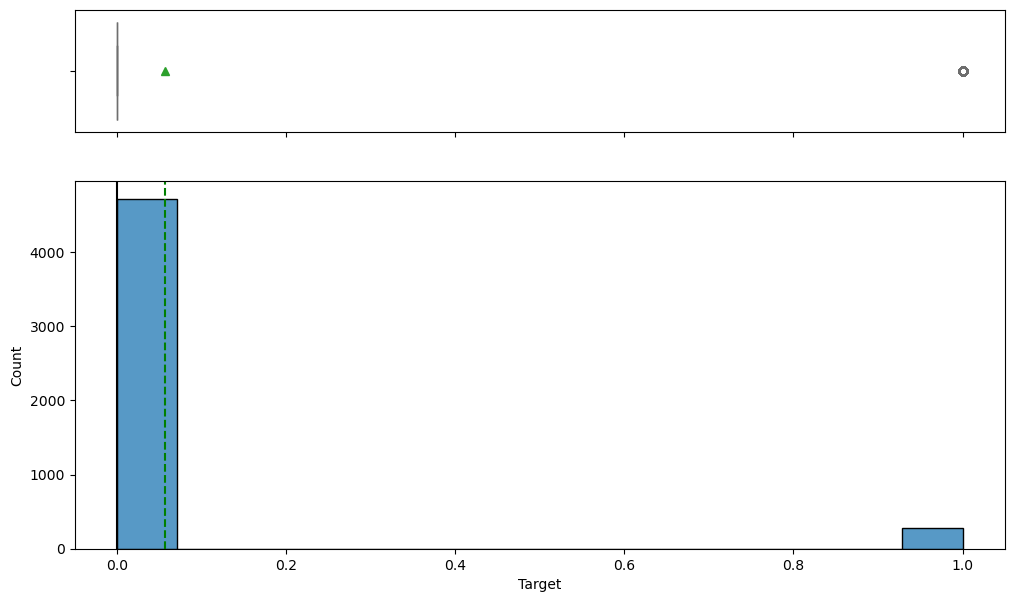

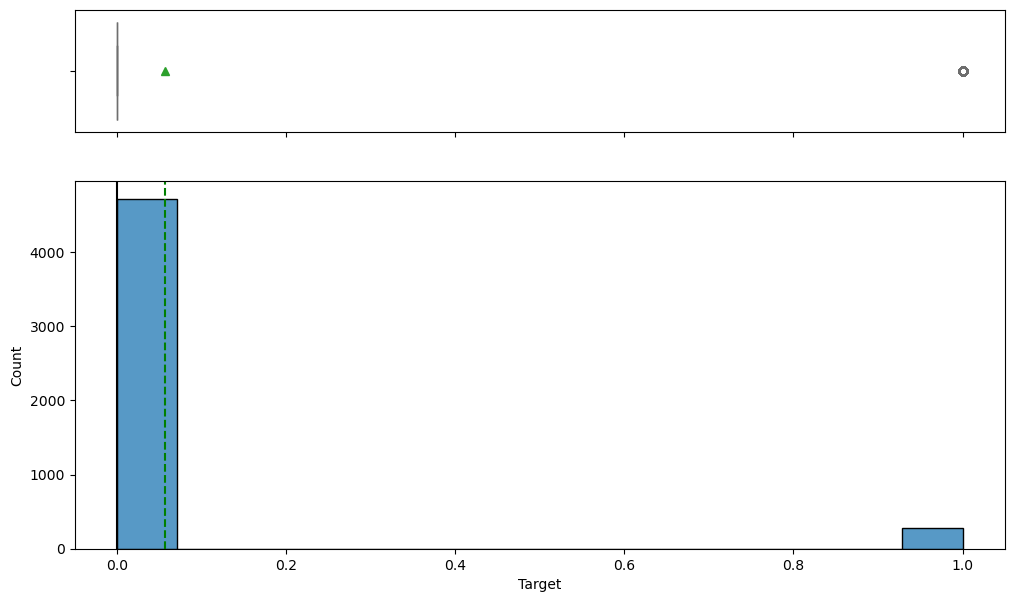

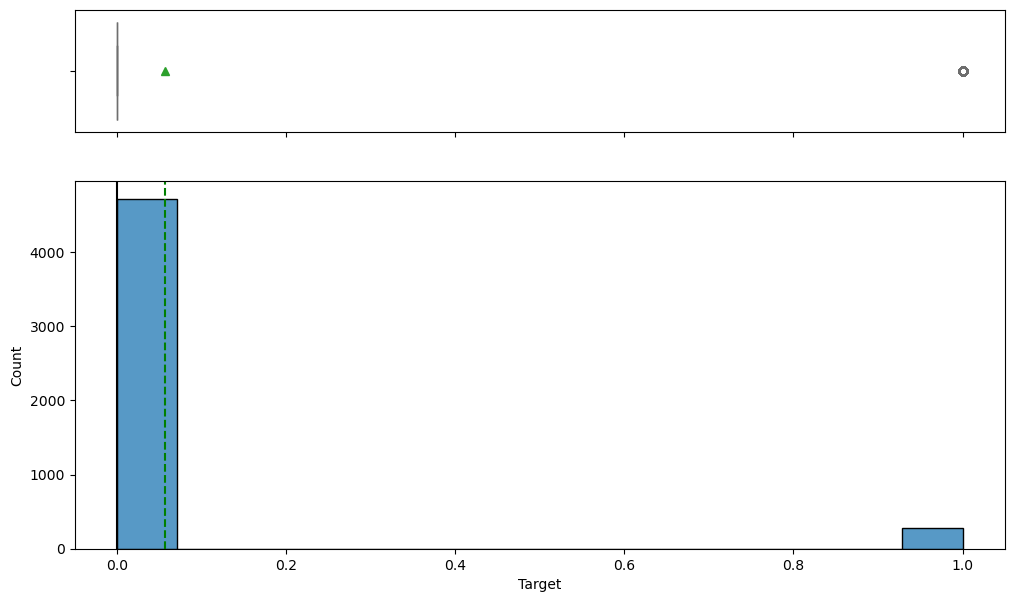

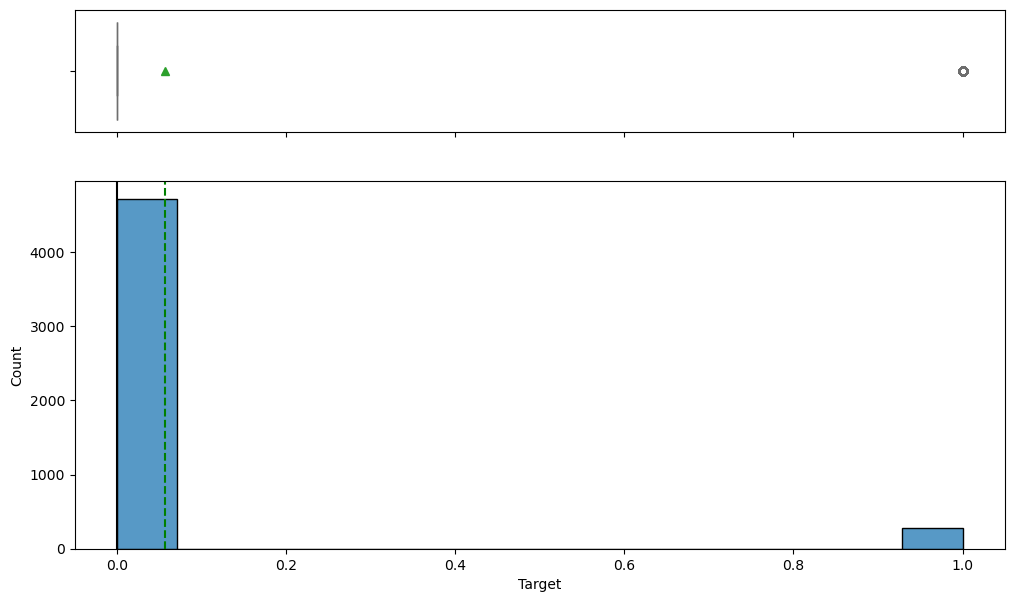

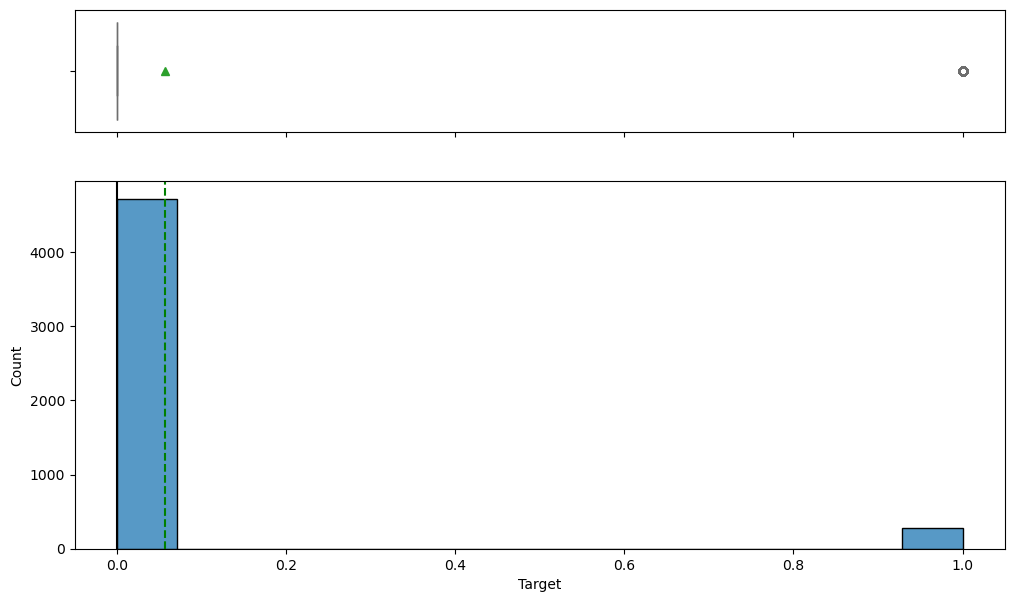

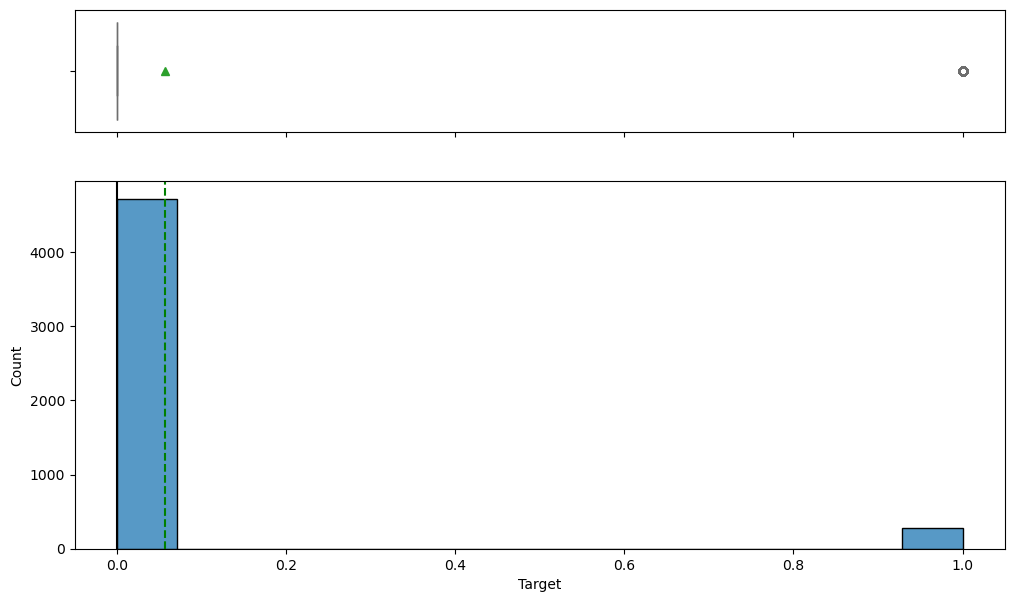

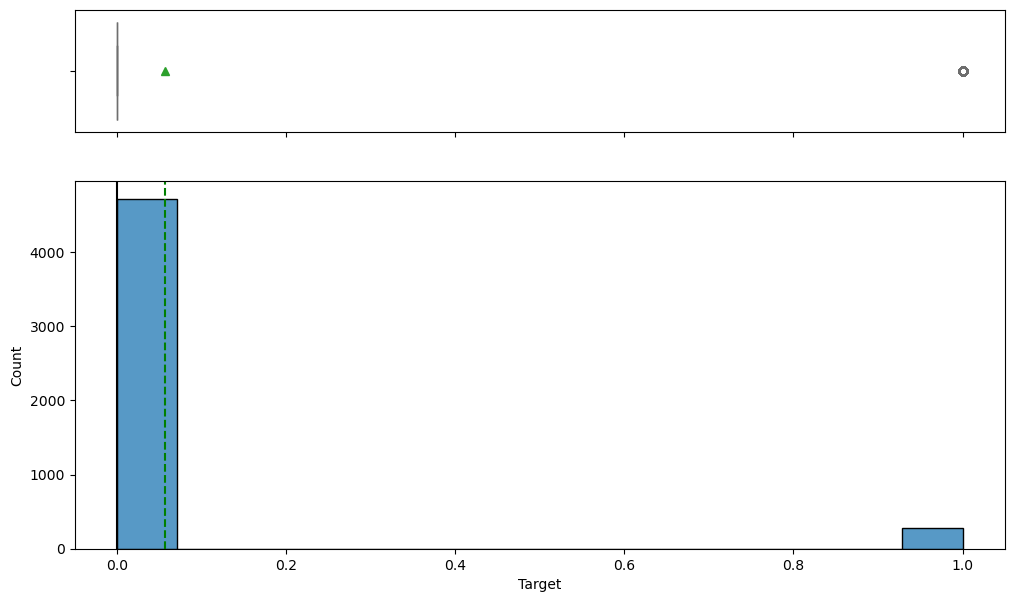

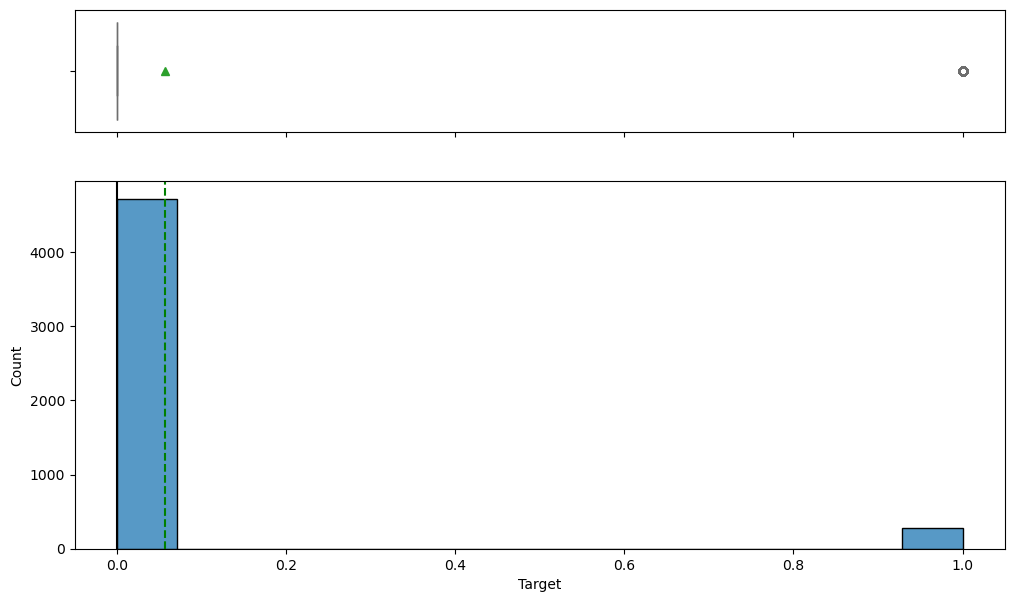

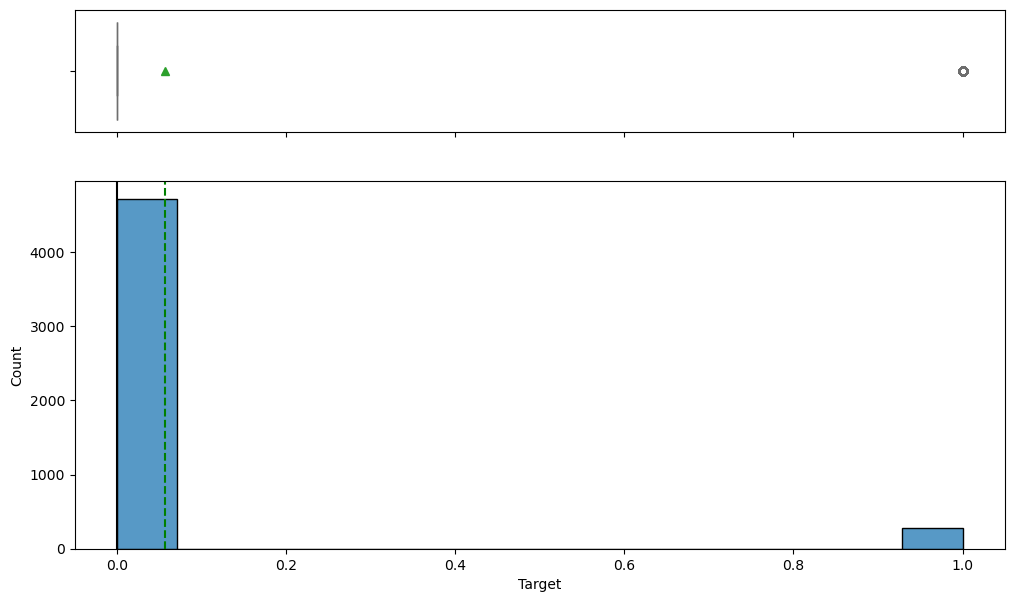

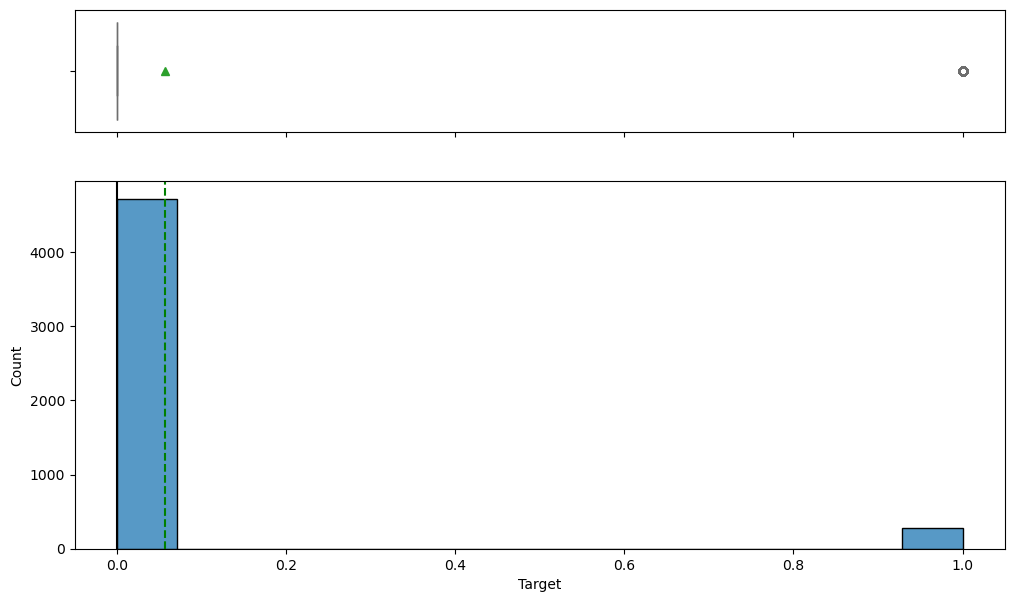

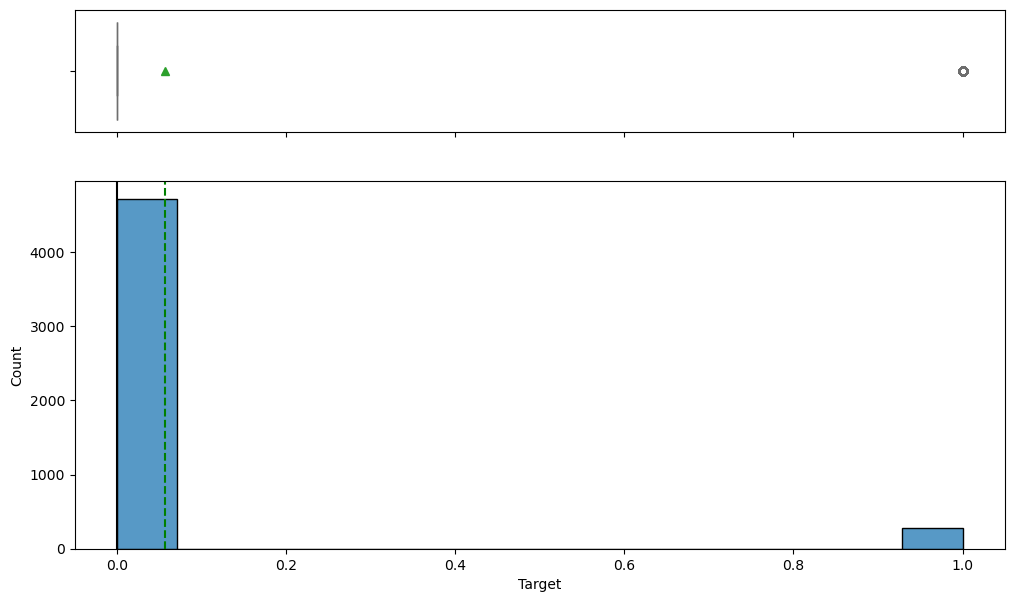

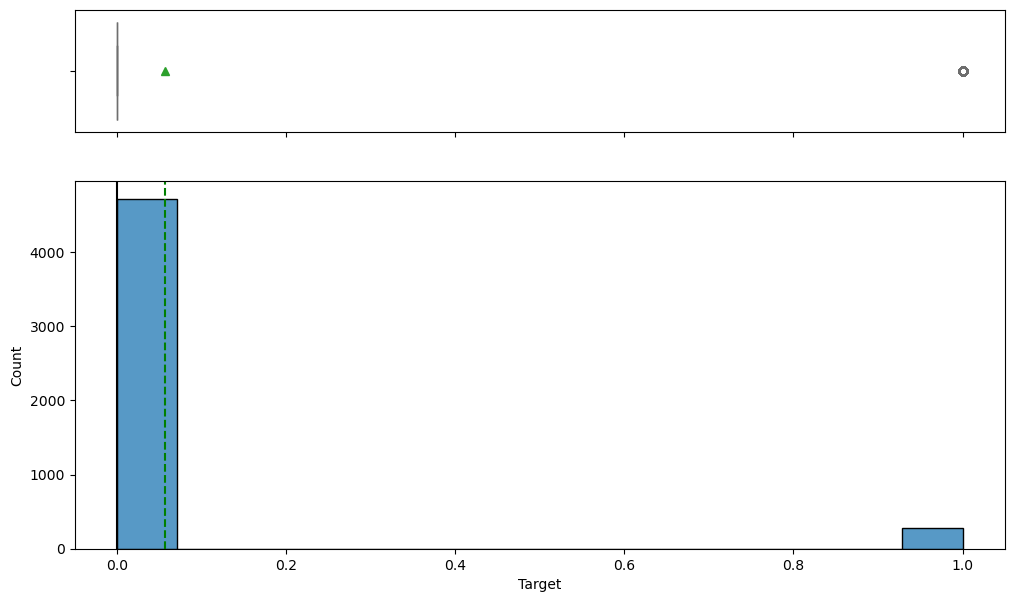

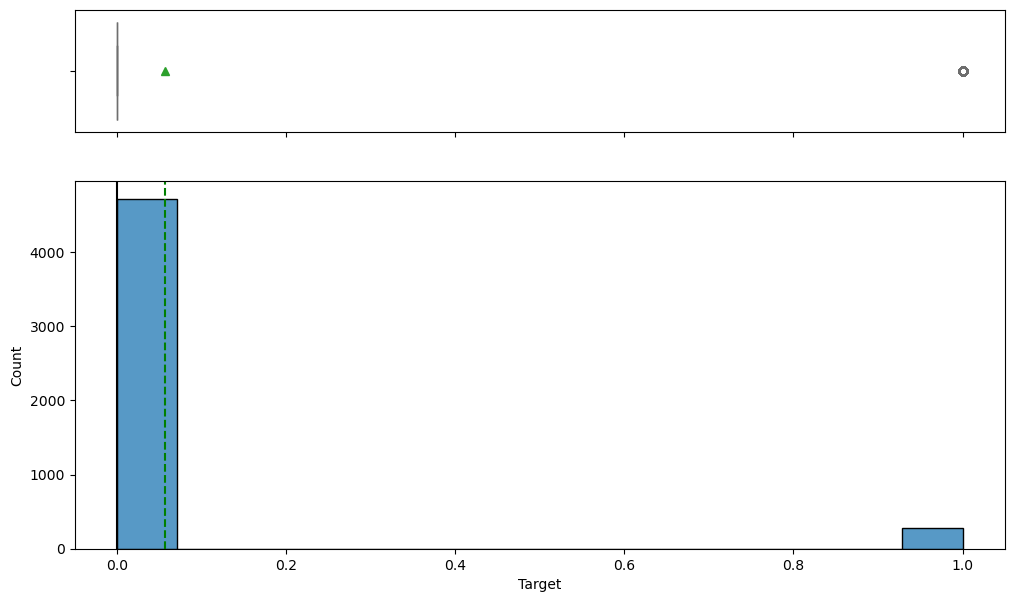

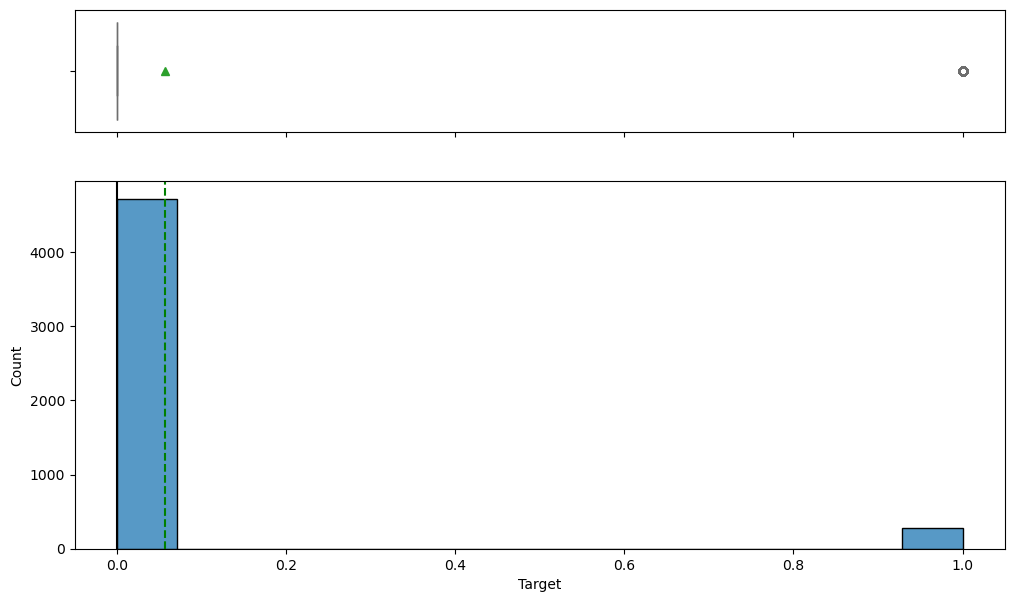

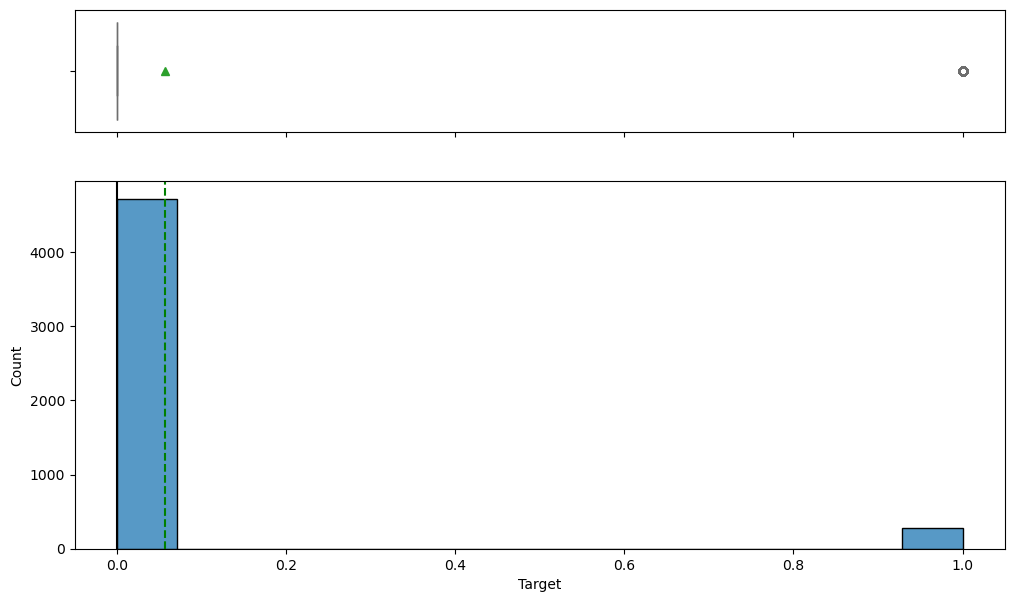

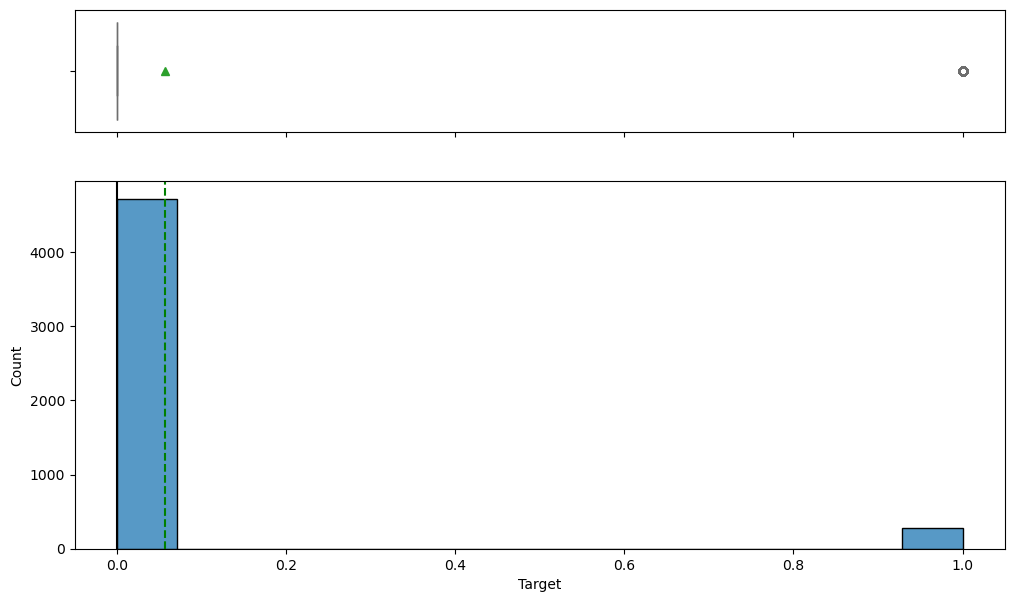

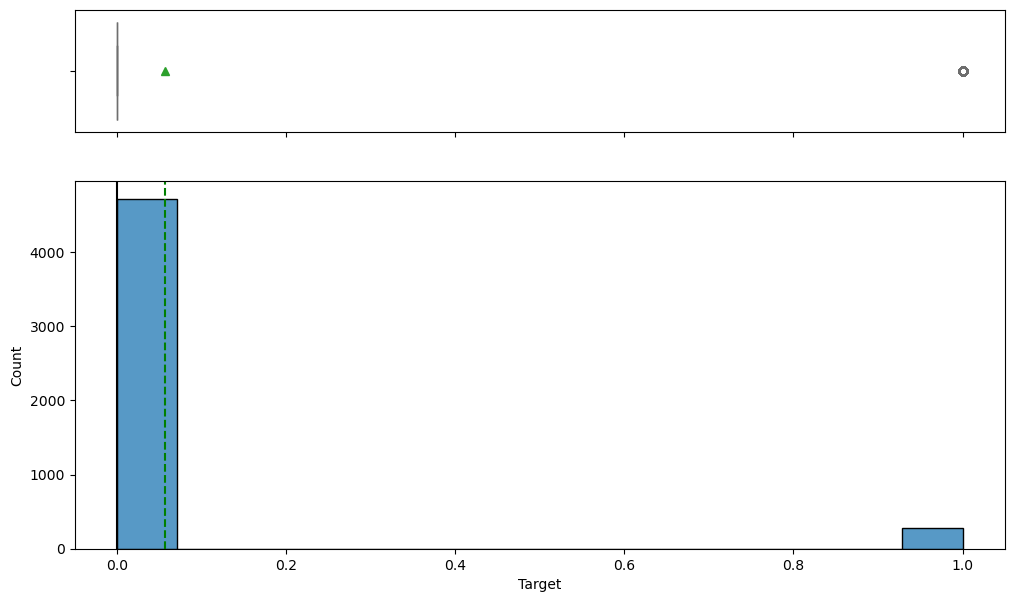

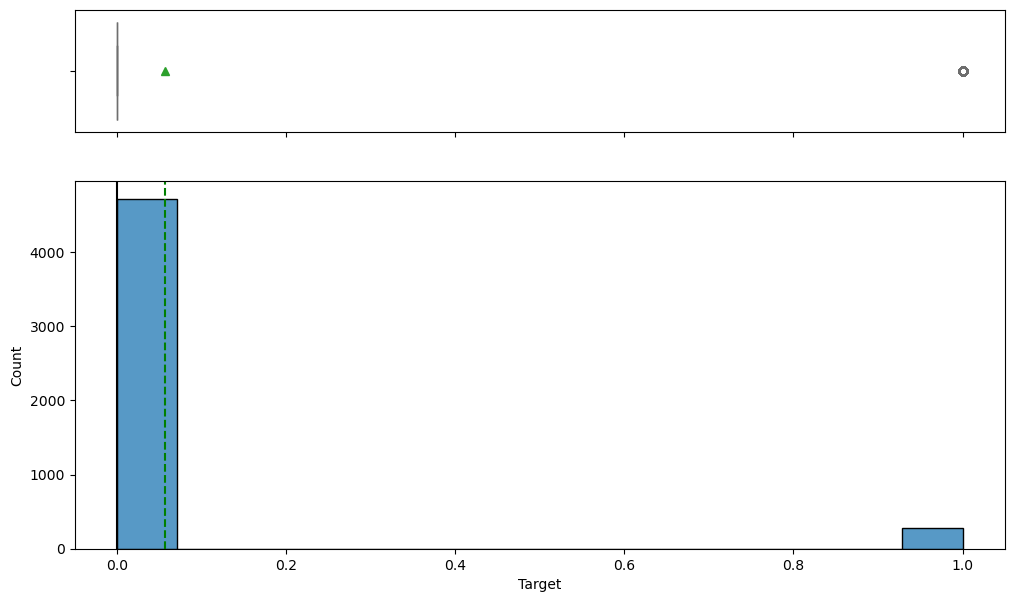

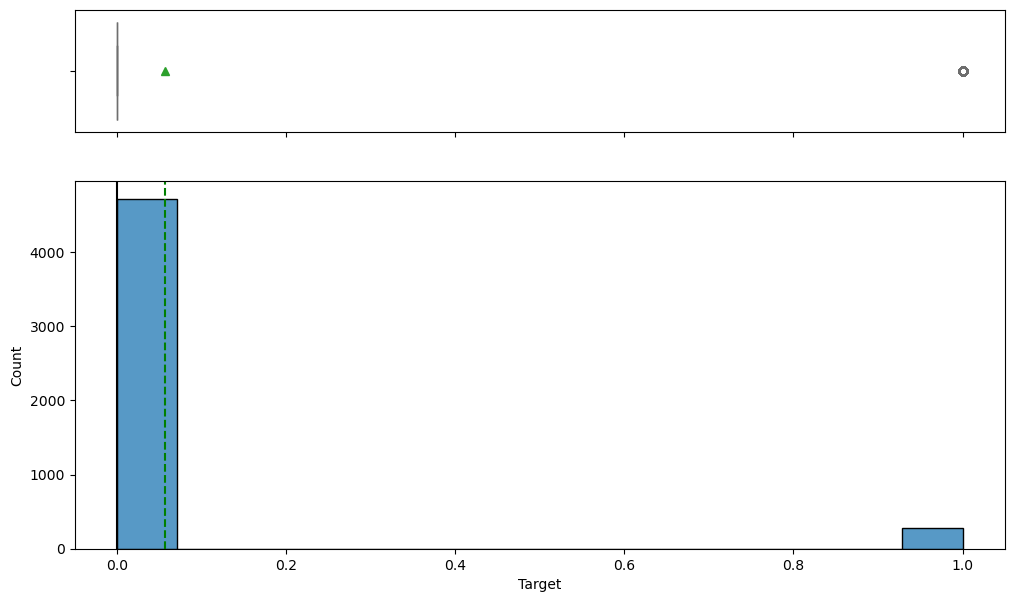

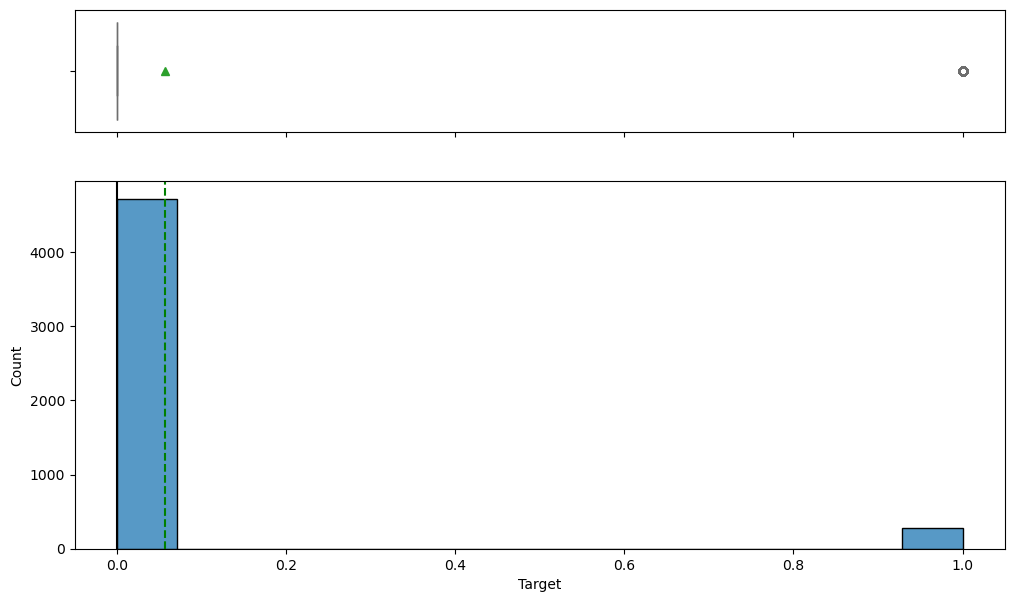

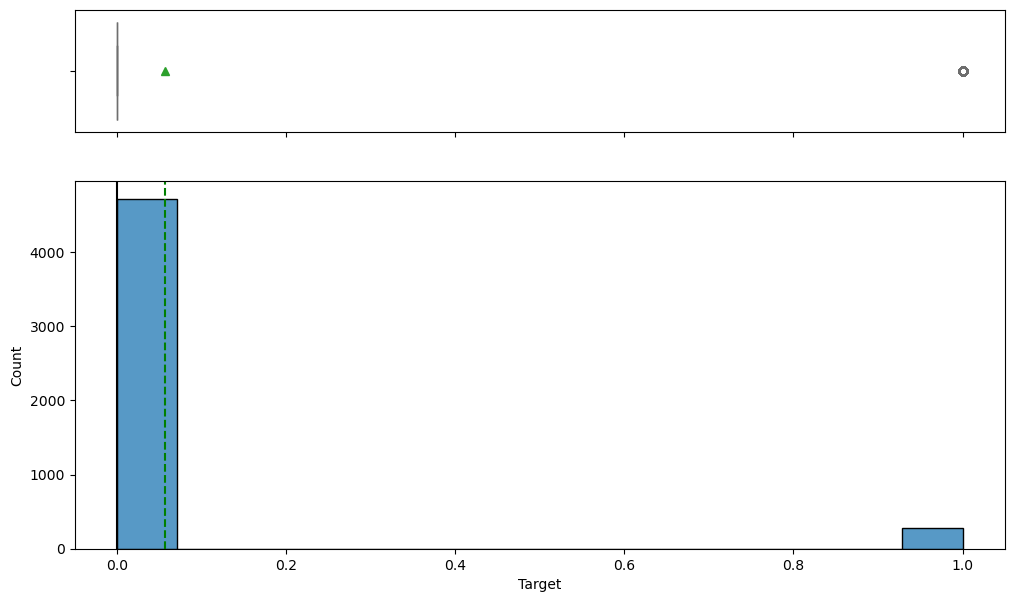

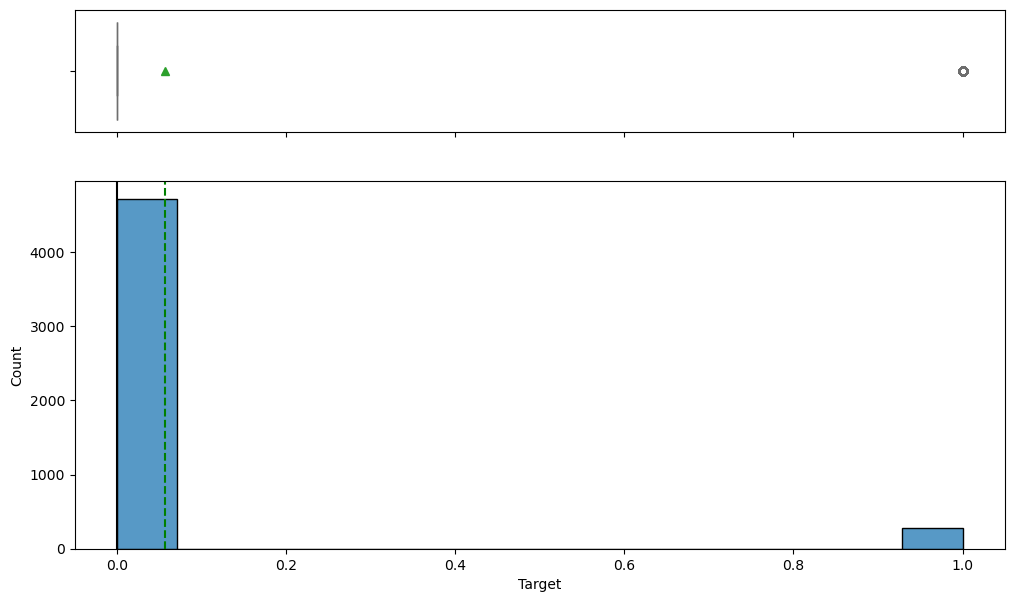

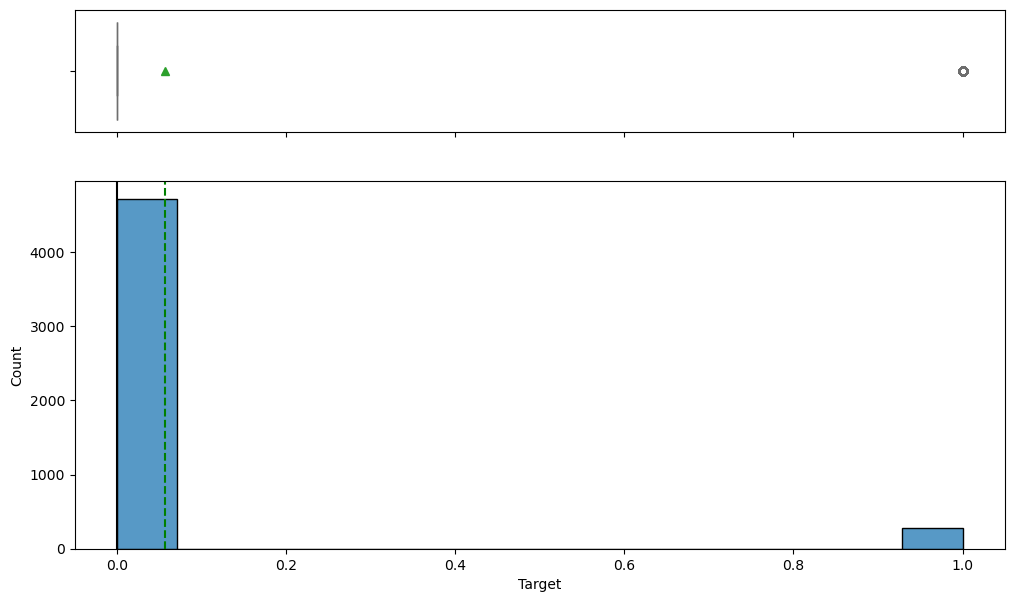

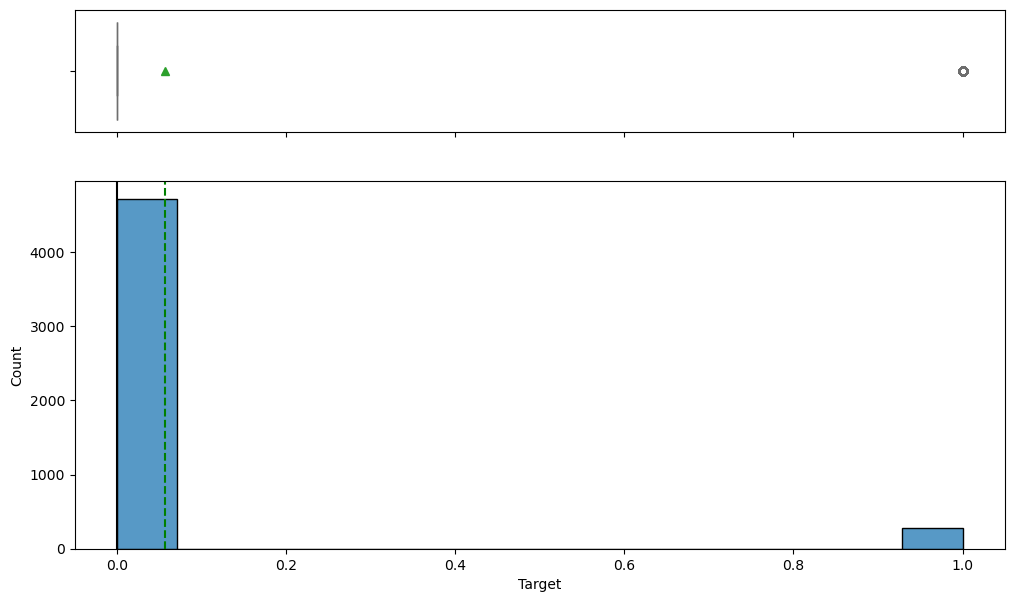

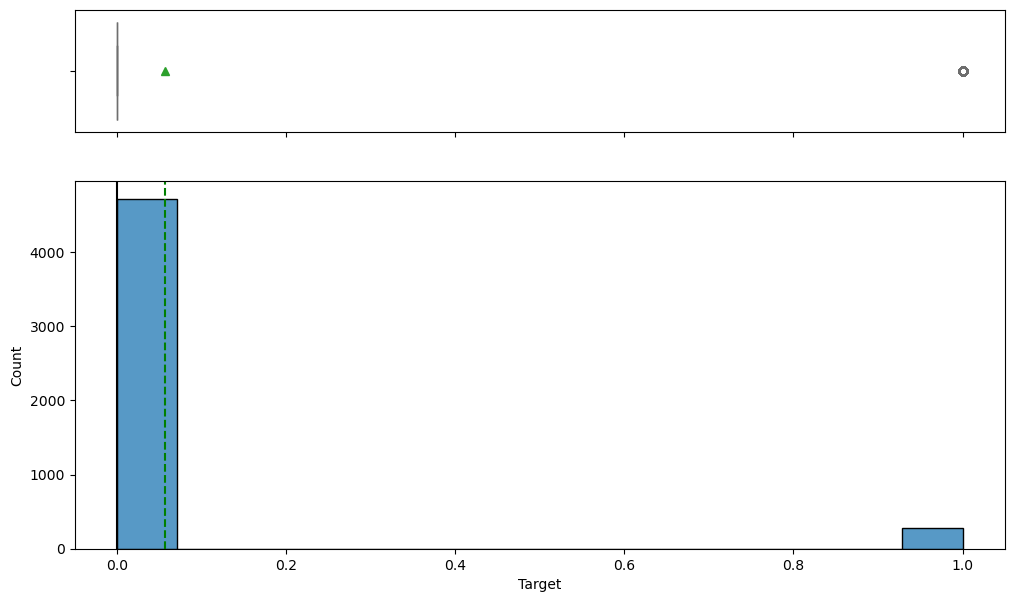

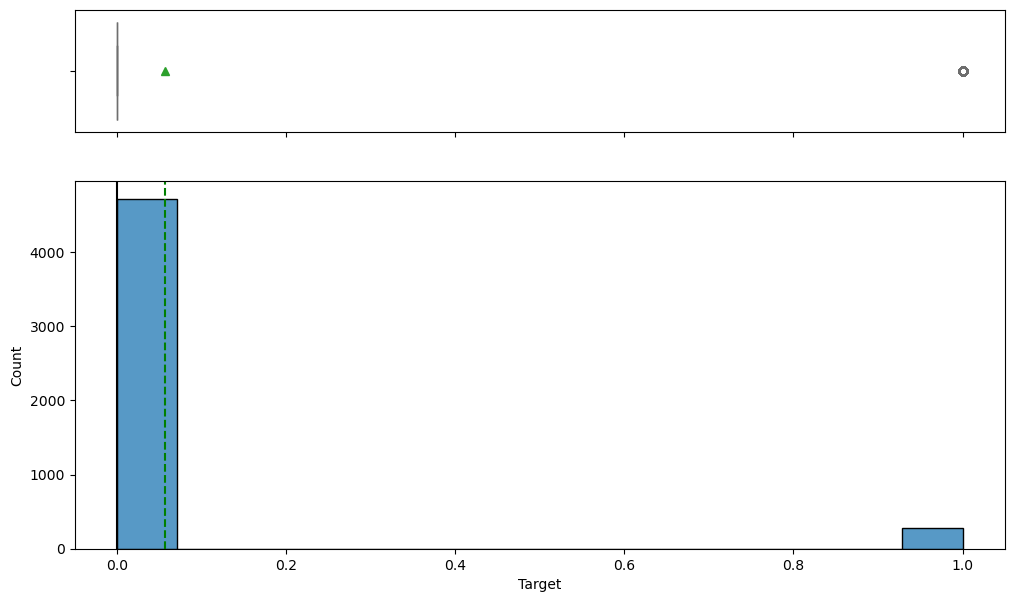

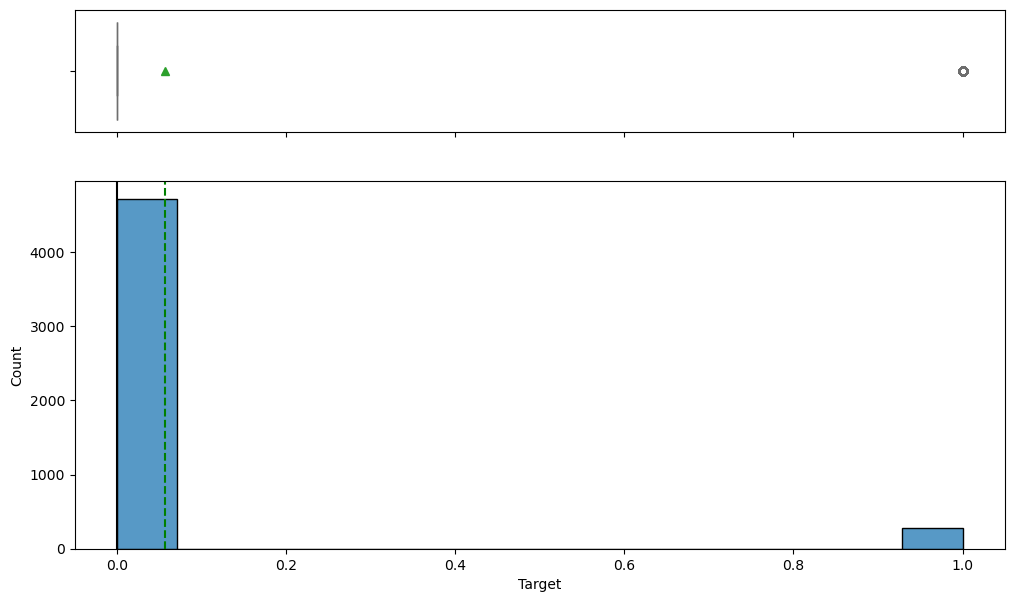

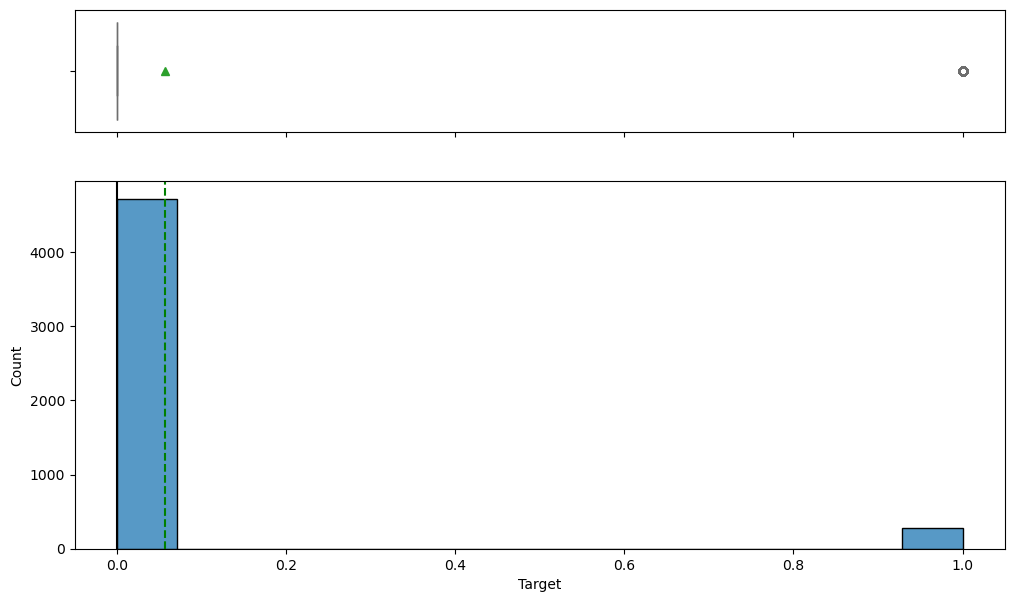

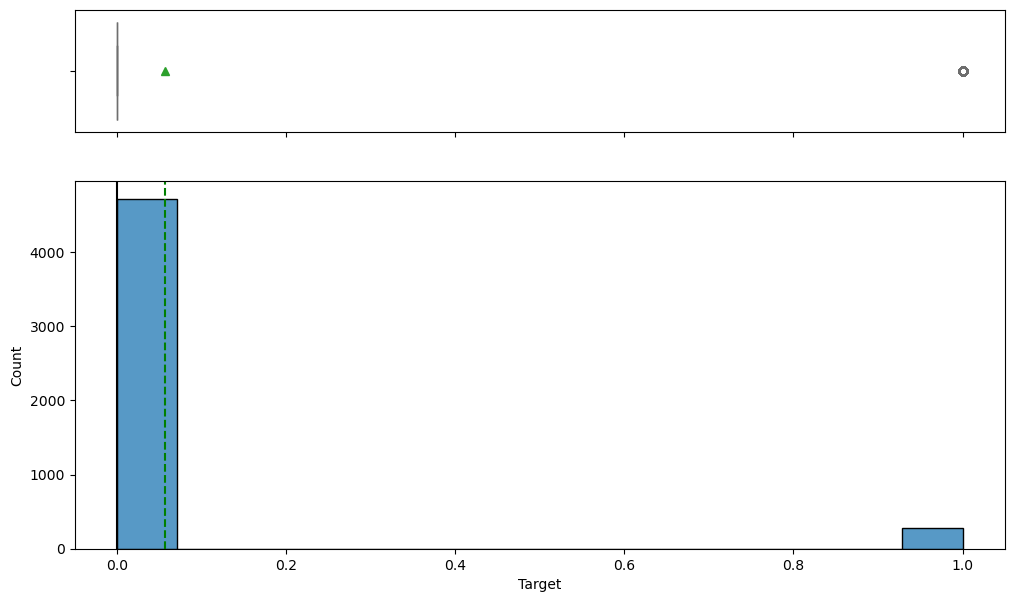

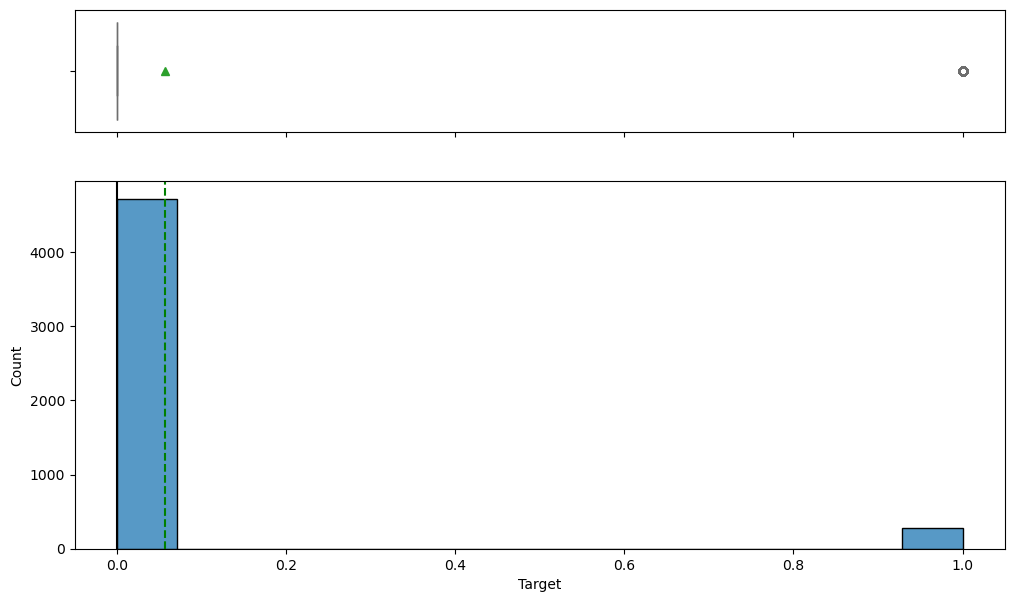

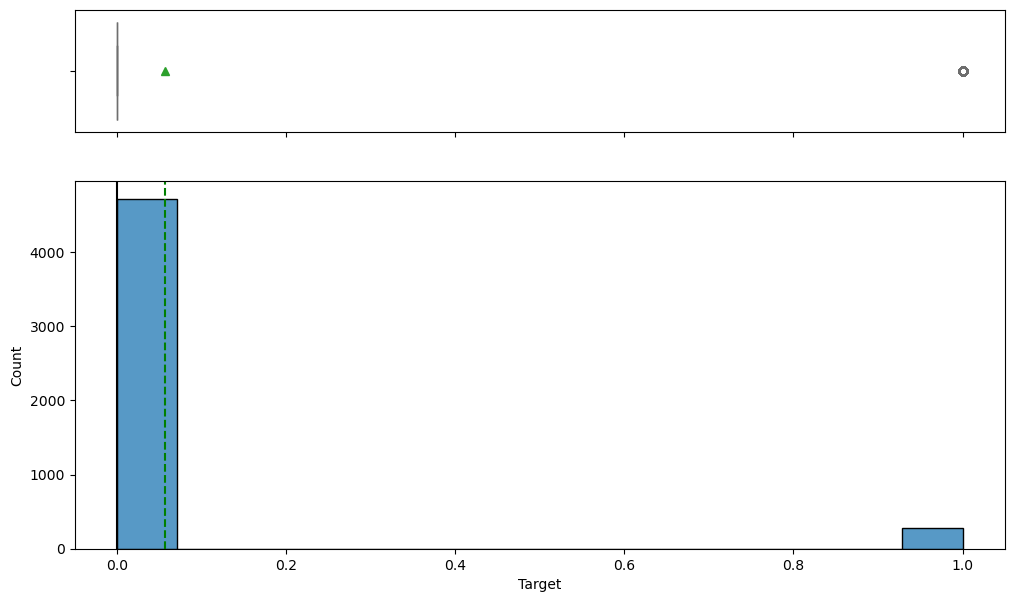

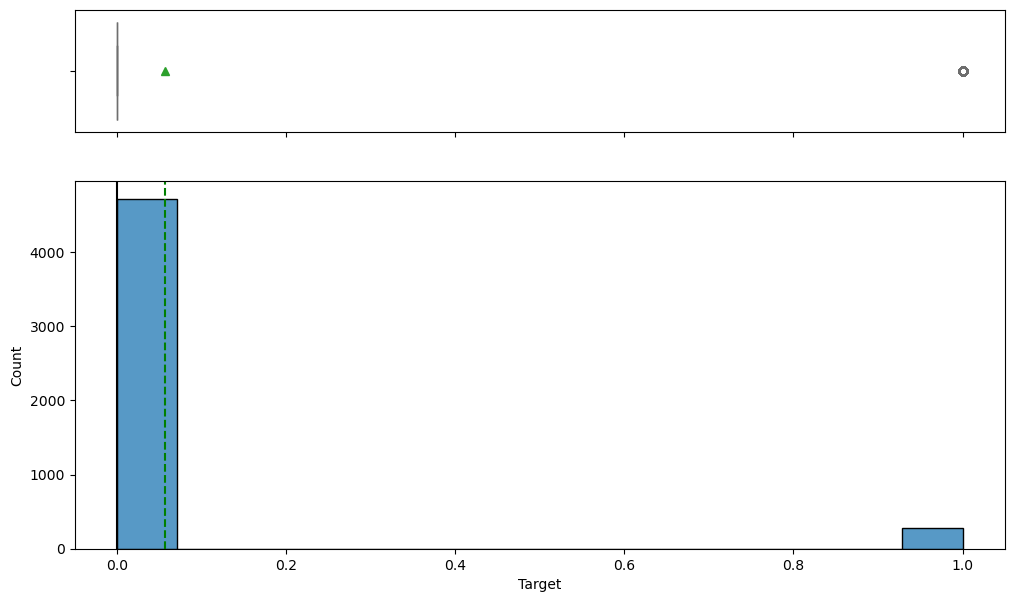

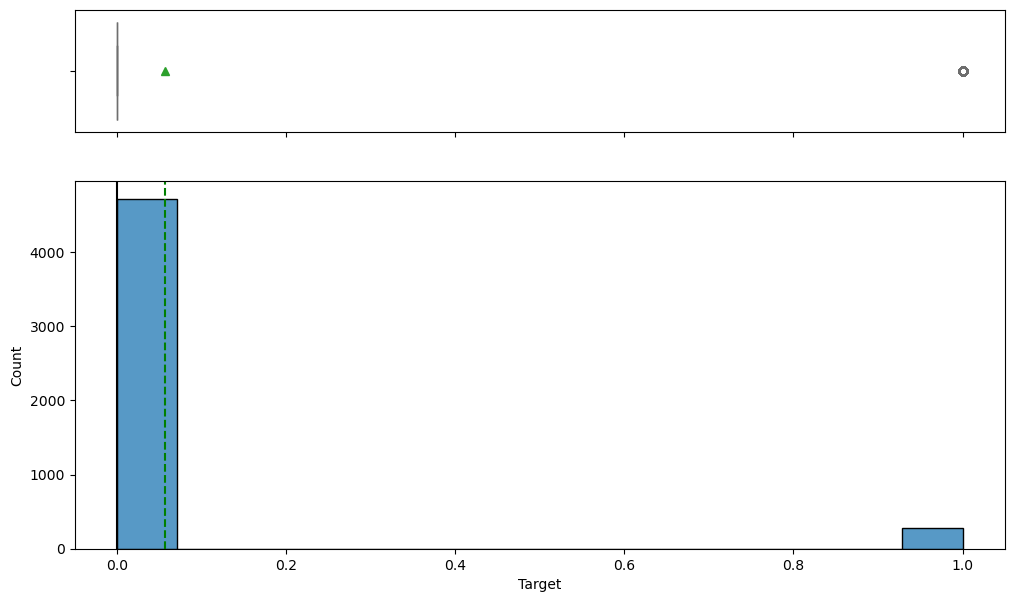

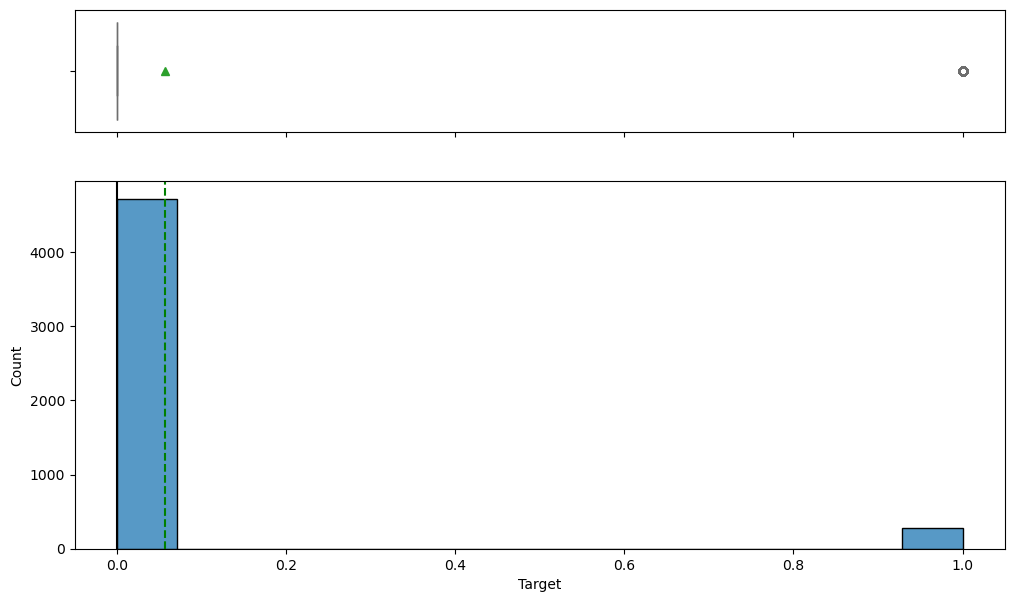

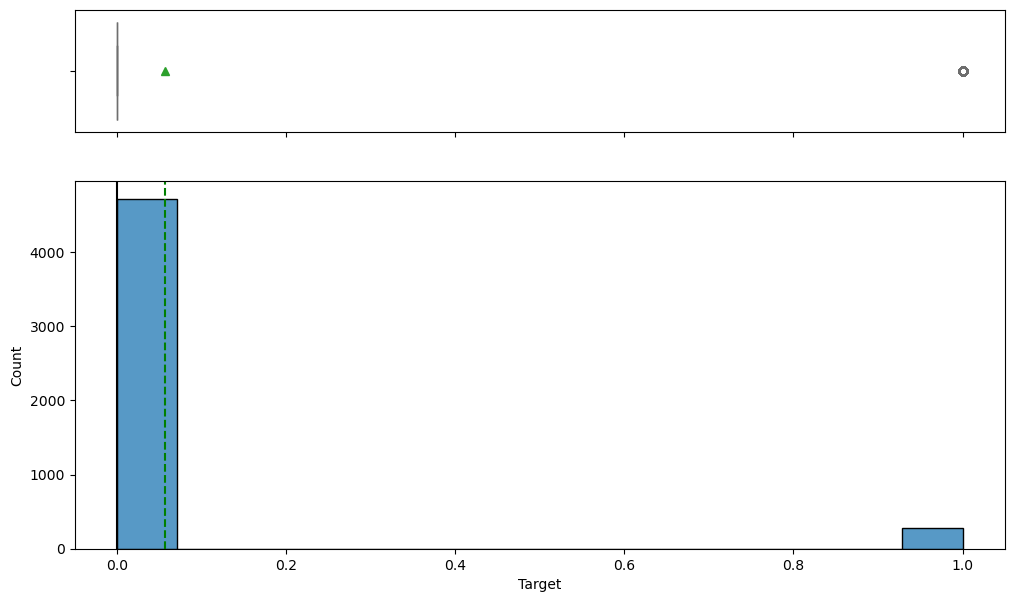

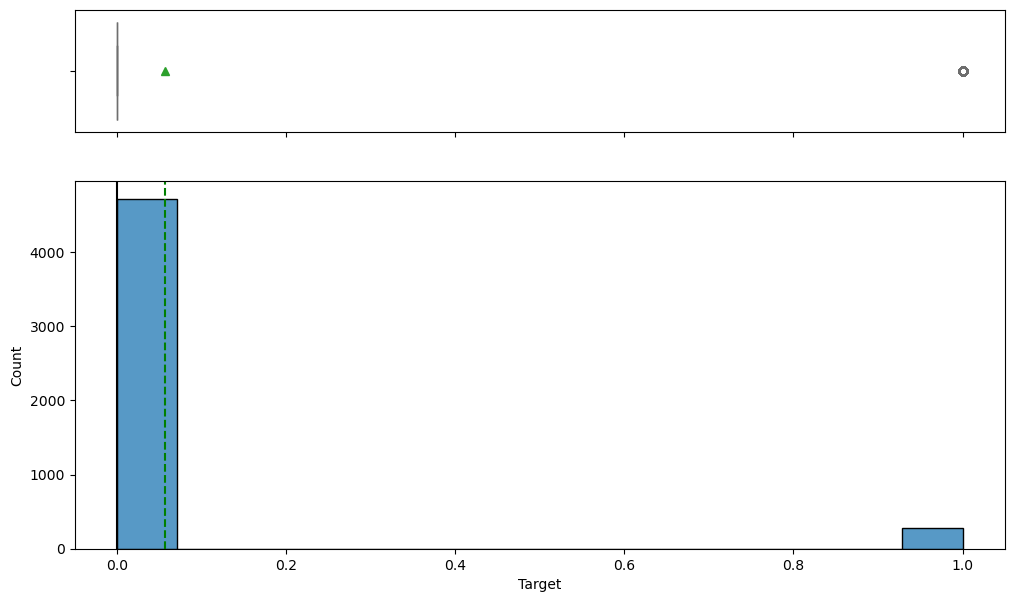

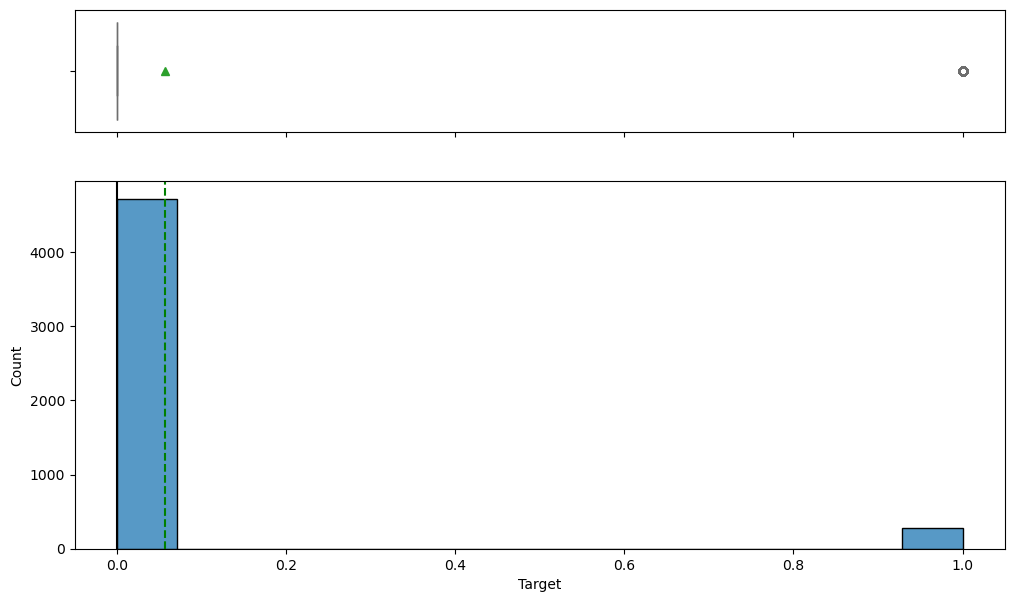

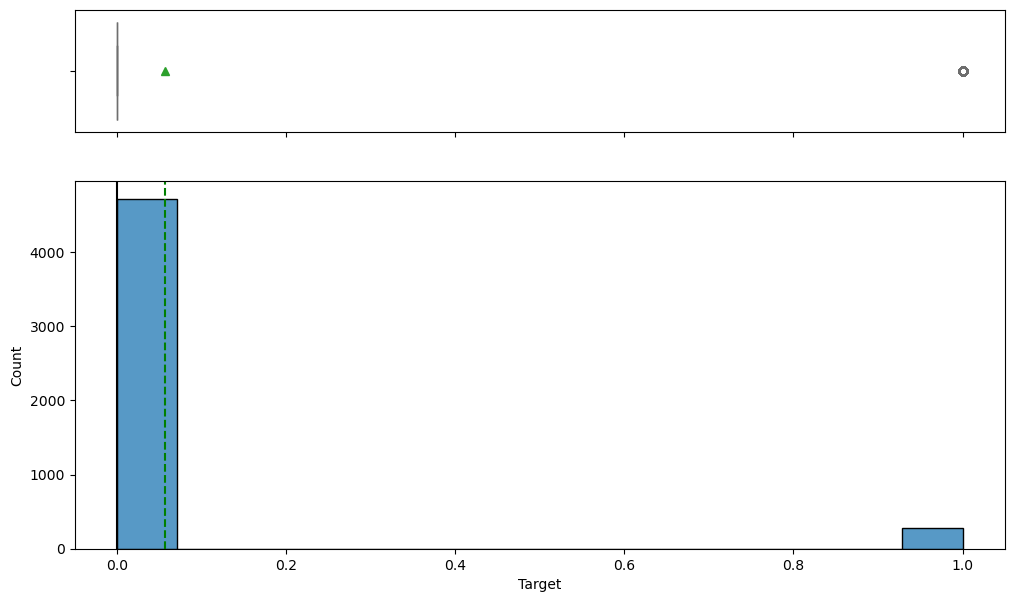

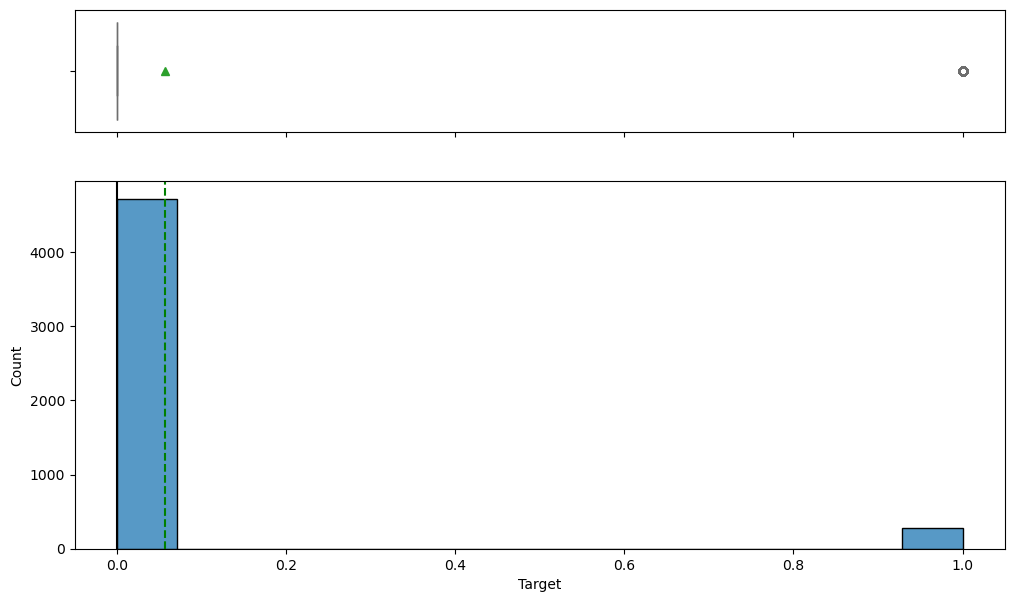

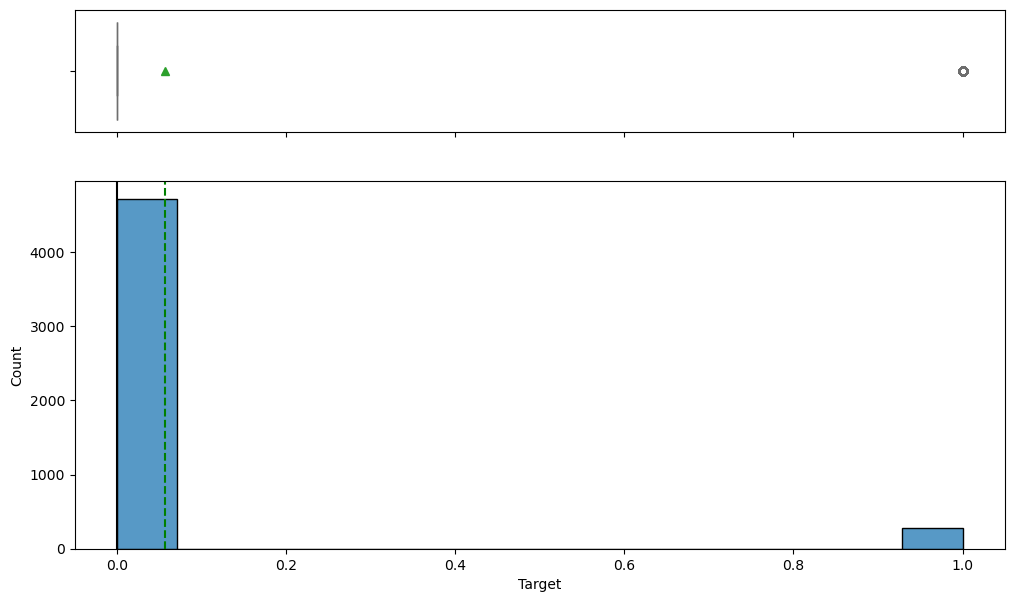

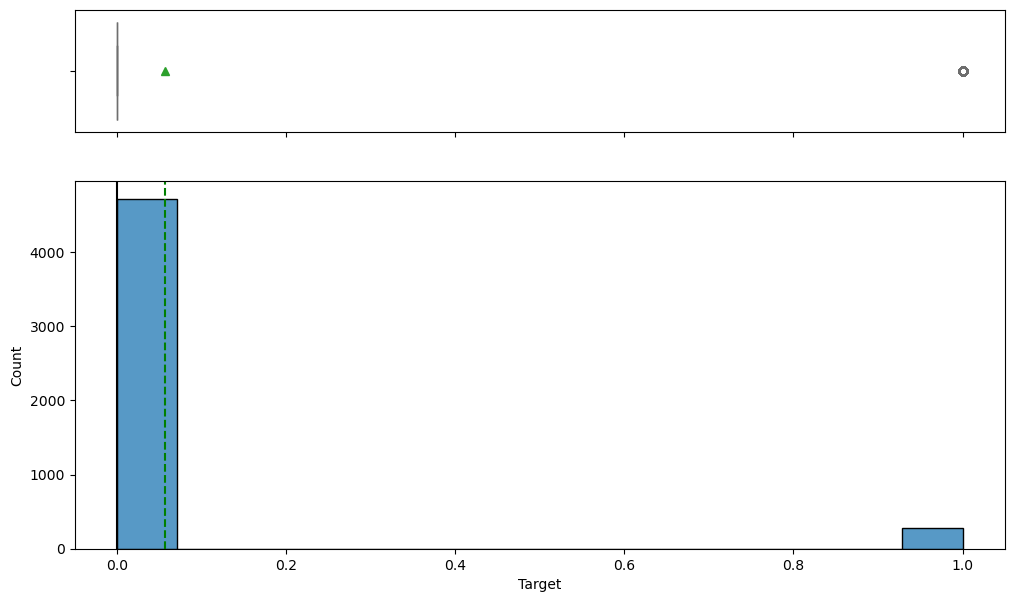

In [40]:
for feature in train_df.columns:
    histogram_boxplot(data=train_df, feature='Target', figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

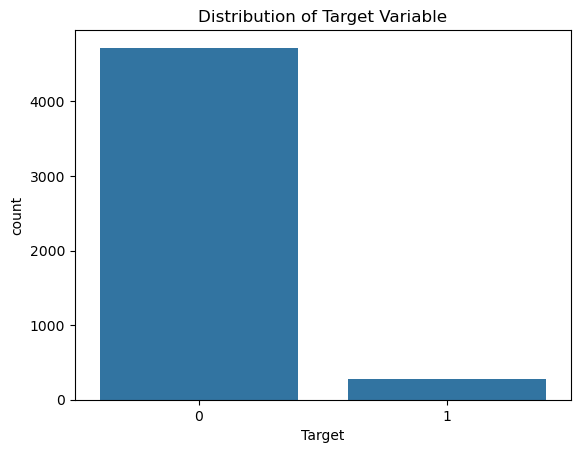

In [42]:
# Plot the distribution of the target variable
sns.countplot(x='Target', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()

#### Distribution of Individual Features

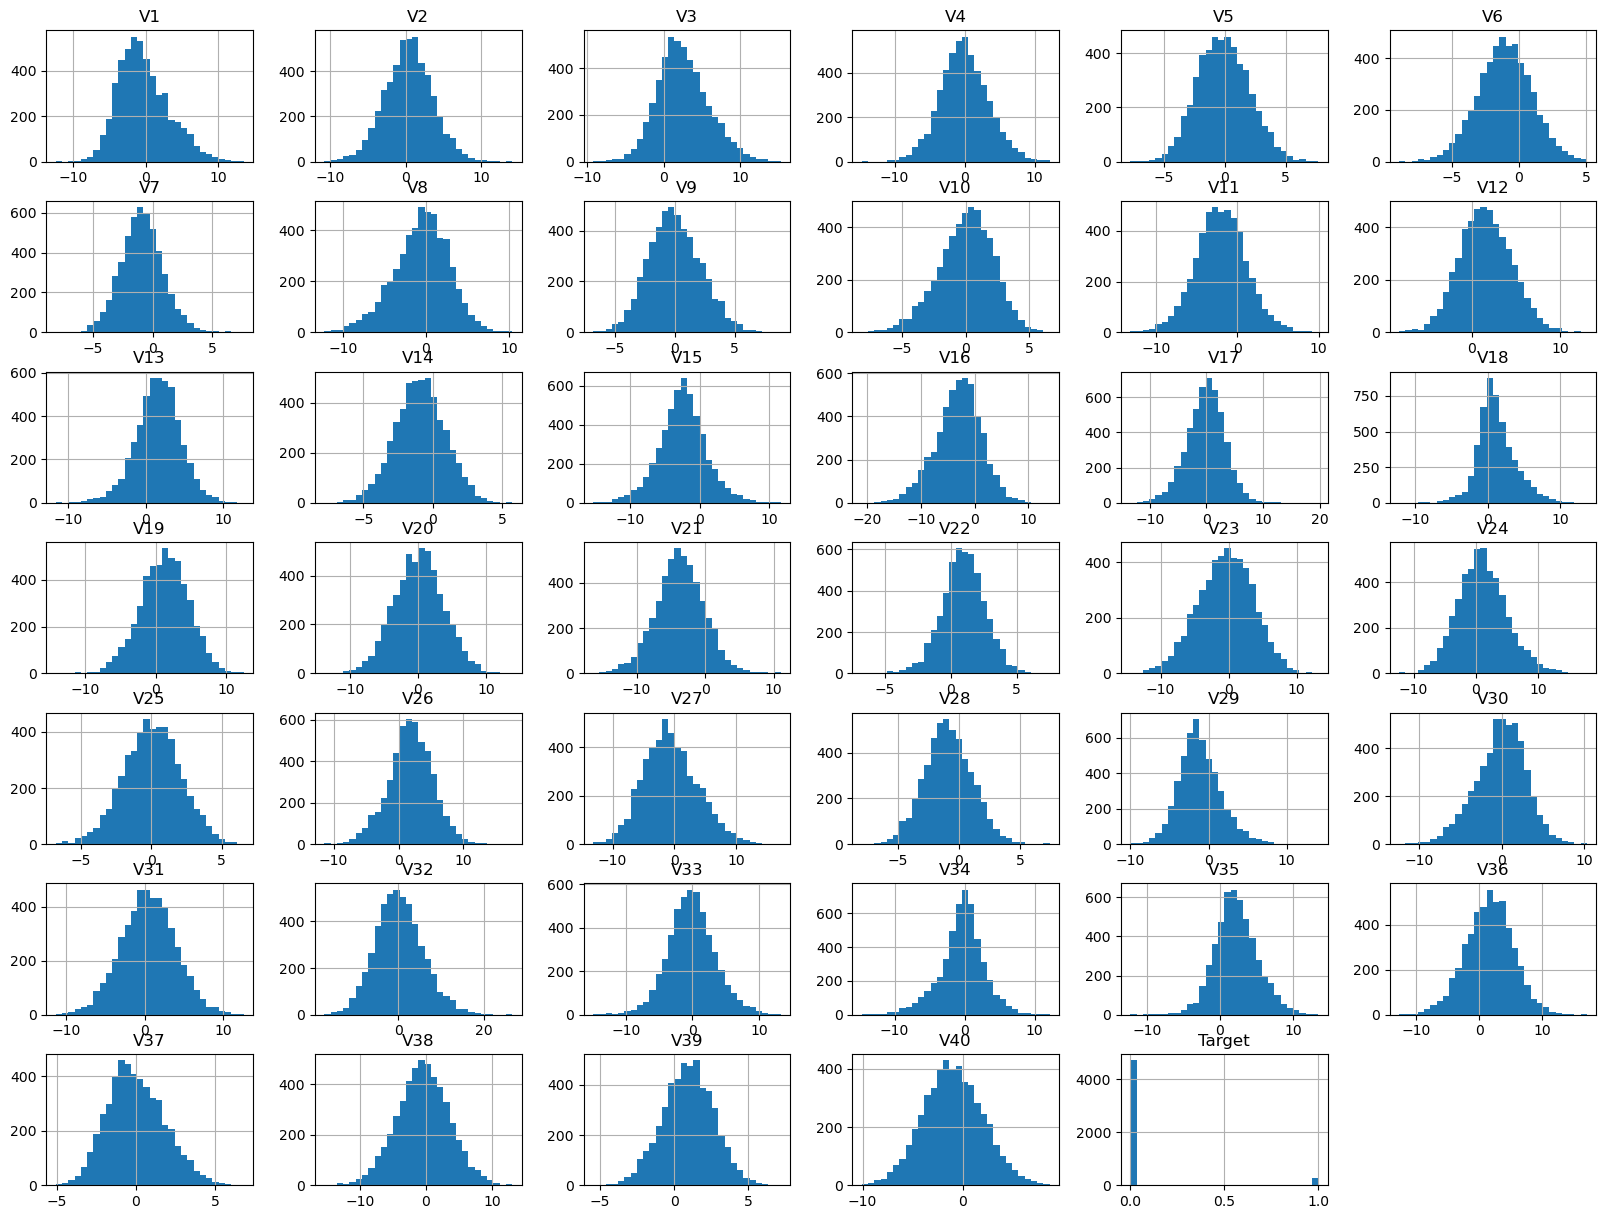

In [48]:
# Plot histograms for a few predictors
train_df.hist(figsize=(20, 15), bins=30)
plt.show()

#### Feature Relationship

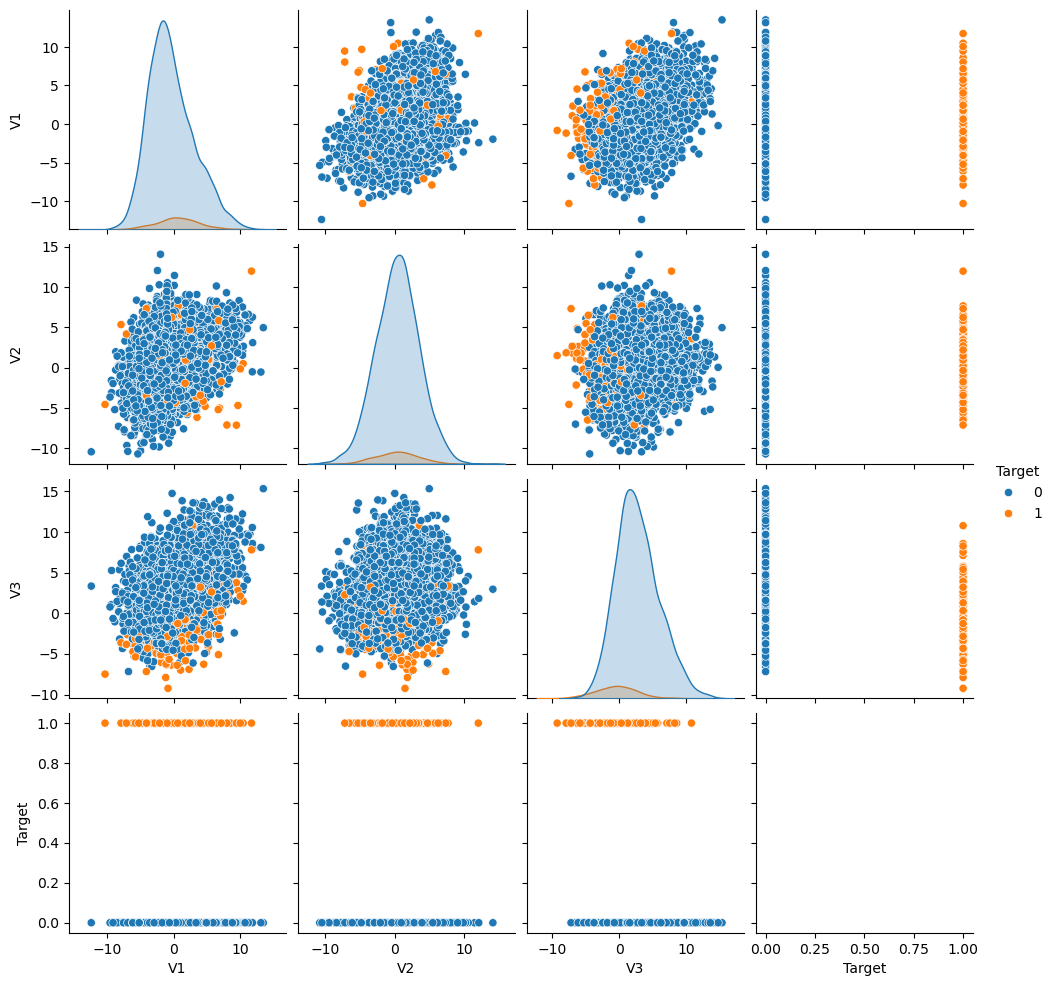

In [52]:
sns.pairplot(train_df, vars=['V1', 'V2', 'V3', 'Target'], hue='Target')
plt.show()

#### Outlier Detection

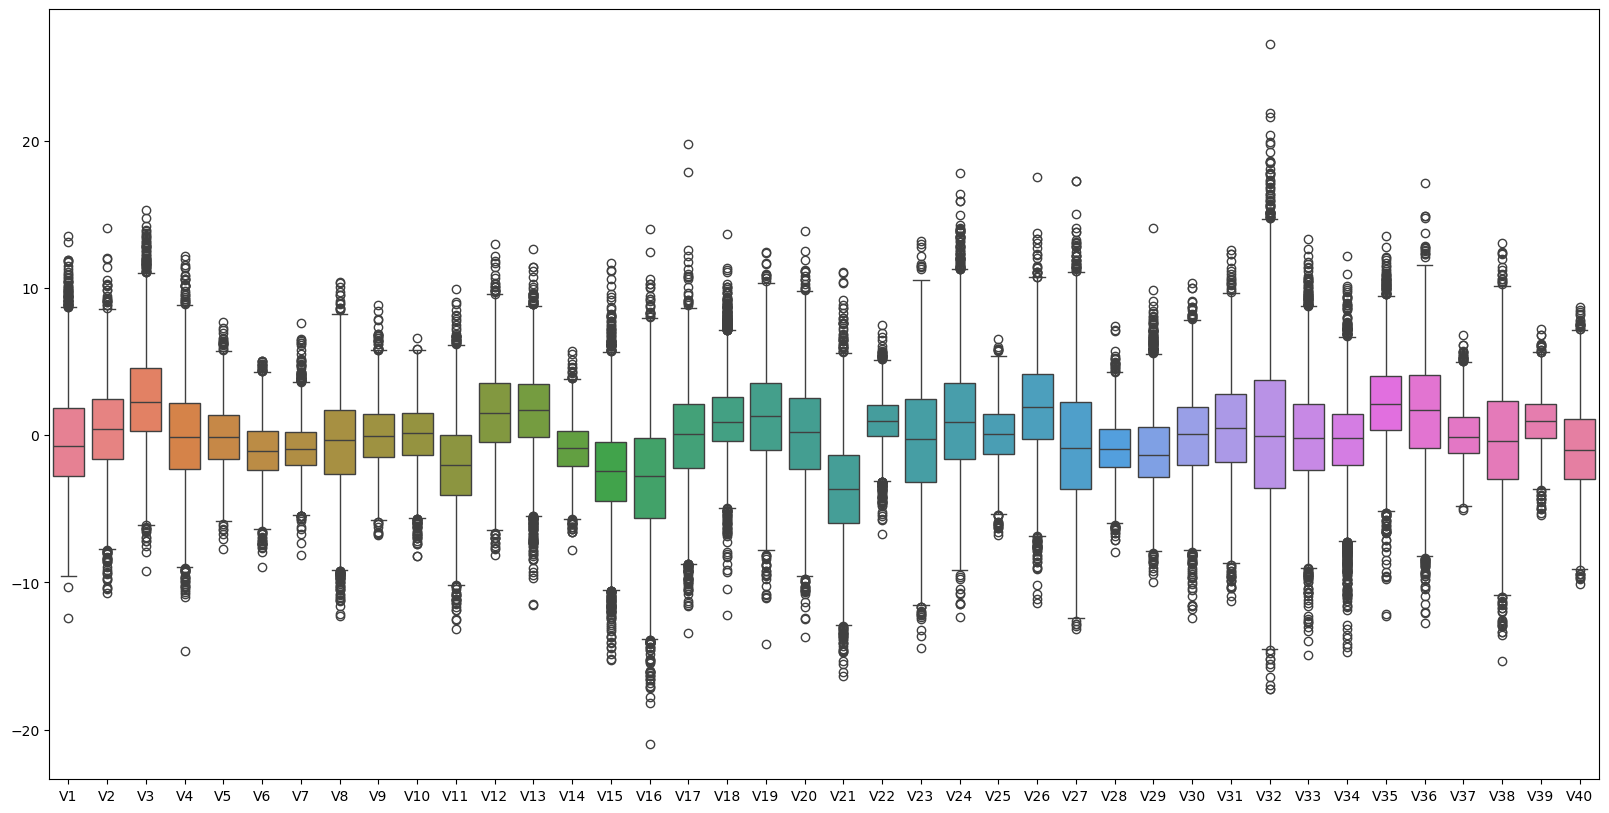

In [56]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df.iloc[:, :-1])
plt.show()

#### Correlation Matrix

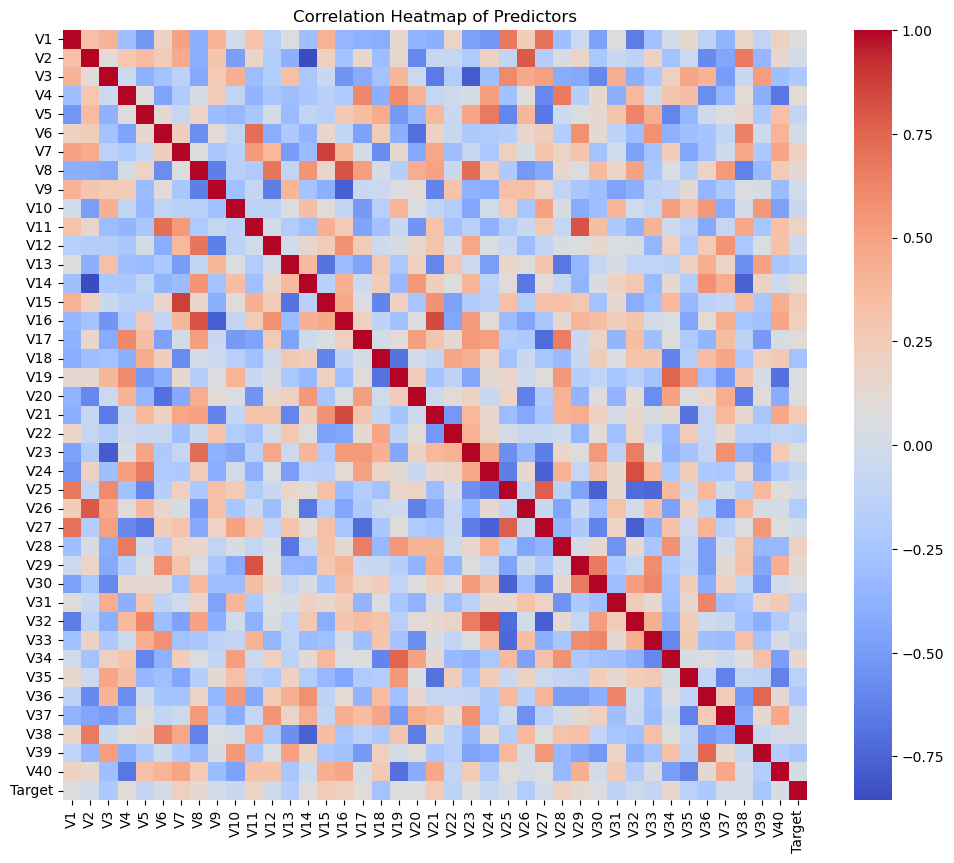

In [58]:
corr_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap of Predictors')
plt.show()

## Data Pre-processing

#### Handle Missing Value

In [67]:
# Impute missing values with the median (or mean), assuming continuous data
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

#### Feature Scaling

In [74]:

# Separate features (X) and target (y)
X_train = train_df.drop(columns=['Target'])
y_train = train_df['Target']

X_test = test_df.drop(columns=['Target'])
y_test = test_df['Target']

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Builing= Original Data
using 6 models: Logistic Regression, Decision Tree, Random Forest, Bagging, Boosting, and SVM.

##### Train, Test, Split for cross validation

In [80]:
from sklearn.model_selection import train_test_split

# Split training data into train and validation sets for model evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

X_train_split, X_val_split, y_train_split, y_val_split

(array([[ 0.09502097, -0.17275498, -0.2495937 , ..., -0.99393445,
         -0.9274625 , -1.60336939],
        [-0.99755645,  0.12011549,  0.17336181, ..., -1.13509913,
          0.30648126, -0.13585106],
        [-0.46862937, -1.14859711, -1.95791756, ..., -0.80682096,
         -0.22471232,  1.33069874],
        ...,
        [ 1.96518301,  0.01189958,  1.61068249, ...,  0.54988337,
          0.96129811,  0.74115456],
        [ 0.15241908,  0.51580999,  0.36403577, ...,  0.97857268,
          0.2785262 , -0.14765477],
        [-1.21567584, -0.89902237, -0.31038176, ..., -1.21251837,
         -0.51544504, -0.80881194]]),
 array([[-0.59711398, -0.12684932, -0.63073373, ..., -0.0636167 ,
         -1.30329966,  0.34121621],
        [-0.59216874, -1.03114373, -0.86600706, ..., -0.46274774,
          0.1983073 ,  0.19456922],
        [-0.87697966, -0.12830268, -0.78159067, ..., -0.39675533,
         -0.05854448,  0.91389202],
        ...,
        [-0.76904746,  0.02409301, -0.55930987, ...,  

#### b. Train the models
##### 1. Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_split, y_train_split)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_val_split)
print(classification_report(y_val_split, y_pred_log))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       935
           1       0.91      0.49      0.64        65

    accuracy                           0.96      1000
   macro avg       0.94      0.74      0.81      1000
weighted avg       0.96      0.96      0.96      1000



##### Decision Tree

In [87]:

from sklearn.tree import DecisionTreeClassifier

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_split, y_train_split)

# Predictions and evaluation
y_pred_tree = tree_clf.predict(X_val_split)
print(classification_report(y_val_split, y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       935
           1       0.65      0.74      0.69        65

    accuracy                           0.96      1000
   macro avg       0.82      0.86      0.83      1000
weighted avg       0.96      0.96      0.96      1000



##### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_split, y_train_split)

# Predictions and evaluation
y_pred_rf = rf_clf.predict(X_val_split)
print(classification_report(y_val_split, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       935
           1       0.96      0.74      0.83        65

    accuracy                           0.98      1000
   macro avg       0.97      0.87      0.91      1000
weighted avg       0.98      0.98      0.98      1000



##### Bagging Classifier

In [93]:
from sklearn.ensemble import BaggingClassifier

# Bagging Classifier
bagging_clf = BaggingClassifier(random_state=42)
bagging_clf.fit(X_train_split, y_train_split)

# Predictions and evaluation
y_pred_bagging = bagging_clf.predict(X_val_split)
print(classification_report(y_val_split, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       935
           1       0.86      0.66      0.75        65

    accuracy                           0.97      1000
   macro avg       0.92      0.83      0.87      1000
weighted avg       0.97      0.97      0.97      1000



##### Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_split, y_train_split)

# Predictions and evaluation
y_pred_gb = gb_clf.predict(X_val_split)
print(classification_report(y_val_split, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       935
           1       0.87      0.74      0.80        65

    accuracy                           0.98      1000
   macro avg       0.93      0.87      0.89      1000
weighted avg       0.97      0.98      0.98      1000



##### Support Vector Machine

In [99]:
from sklearn.svm import SVC

# SVM
svm_clf = SVC()
svm_clf.fit(X_train_split, y_train_split)

# Predictions and evaluation
y_pred_svm = svm_clf.predict(X_val_split)
print(classification_report(y_val_split, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       935
           1       0.98      0.86      0.92        65

    accuracy                           0.99      1000
   macro avg       0.99      0.93      0.96      1000
weighted avg       0.99      0.99      0.99      1000



#### Model Building - Oversampled Data
##### We'll use SMOTE to oversample the minority class

In [119]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_train_oversample, y_train_oversample = sm.fit_resample(X_train_scaled, y_train)

# Train models on the oversampled data (repeat the models above with X_train_oversample and y_train_oversample)

In [187]:
# Function to extract metrics (precision, recall, f1-score) from the classification report
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    # Extracting metrics for "failure" class (Target = 1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    return pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1_score]
    })

# Initialize an empty DataFrame to store all the results
resultsdf = pd.DataFrame()

In [133]:
# Logistic Regression
log_reg_oversample = LogisticRegression()
log_reg_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_log_oversample = log_reg_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_log_oversample, 'Logistic Regression (Oversampled)')])

In [189]:
# Decision Tree
tree_clf_oversample = DecisionTreeClassifier(random_state=42)  # Make sure this is defined
tree_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_tree_oversample = tree_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_tree_oversample, 'Decision Tree (Oversampled)')])

In [191]:
# Random Forest
rf_clf_oversample = RandomForestClassifier(random_state=42)  # Make sure this is defined
rf_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_rf_oversample = rf_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_rf_oversample, 'Random Forest (Oversampled)')])

In [192]:
# Bagging Classifier
bagging_clf_oversample = BaggingClassifier(random_state=42)  # Make sure this is defined
bagging_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_bagging_oversample = bagging_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_bagging_oversample, 'Bagging Classifier (Oversampled)')])

In [194]:
# Gradient Boosting
gb_clf_oversample = GradientBoostingClassifier(random_state=42)  # Make sure this is defined
gb_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_gb_oversample = gb_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_gb_oversample, 'Gradient Boosting (Oversampled)')])

In [196]:
# XGBoost with oversampling
xgb_clf_oversample = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_xgb_oversample = xgb_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_xgb_oversample, 'XGBoost (Oversampled)')])

In [197]:
# AdaBoost with oversampling
ada_clf_oversample = AdaBoostClassifier(random_state=42)
ada_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_ada_oversample = ada_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_ada_oversample, 'AdaBoost (Oversampled)')])

C:\Users\chedeema\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [198]:
# SVM
svm_clf_oversample = SVC()  # Make sure this is defined
svm_clf_oversample.fit(X_train_oversample, y_train_oversample)

# Predictions on the validation set
y_pred_svm_oversample = svm_clf_oversample.predict(X_val_split)

# Collect and store results
resultsdf = pd.concat([resultsdf, get_metrics(y_val_split, y_pred_svm_oversample, 'SVM (Oversampled)')])

In [205]:
resultsdf.reset_index(drop=True, inplace=True)

# Display the results
resultsdf

,Model,Precision,Recall,F1-Score
0,Decision Tree (Oversampled),1.000000,1.000000,1.000000
1,Random Forest (Oversampled),1.000000,1.000000,1.000000
2,Bagging Classifier (Oversampled),0.984848,1.000000,0.992366
3,Gradient Boosting (Oversampled),0.746988,0.953846,0.837838
4,XGBoost (Oversampled),1.000000,1.000000,1.000000
5,AdaBoost (Oversampled),0.444444,0.923077,0.600000
6,SVM (Oversampled),0.926471,0.969231,0.947368


#### Best Performing Model:
F1-Score is the most balanced metric to evaluate performance when both precision and recall are important.
##### Models with an F1-Score of 1.000:
- Decision Tree (Oversampled)
- Random Forest (Oversampled)
- XGBoost (Oversampled)
These models all achieved a perfect F1-Score of 1.000, indicating that they perfectly classified the dataset during the evaluation. However, this might suggest the dataset is either too simple, or the models might be overfitting. If you're looking for generalization, further validation on a separate test set might be necessary.

##### Insights:
- AdaBoost (Oversampled) has relatively poor performance with an F1-Score of 0.600, making it the weakest among the models.
- Gradient Boosting (Oversampled), while not perfect, has a F1-Score of 0.837838, which may indicate it's performing reasonably well in more complex cases compared to the perfect classifiers.

#### Summary
- Precision: Measures how many of the predicted failures were actually failures (low precision means a lot of false positives).
- Recall: Measures how many actual failures were correctly predicted (low recall means a lot of false negatives).
- F1-Score: The harmonic mean of precision and recall, providing a balanced metric.
#### Conclusion:
These metrics help assess the models' ability to correctly predict wind turbine failures while minimizing false positives and false negatives.
By comparing these metrics, you can decide which model best suits your business needs.
For example, if minimizing false negatives (missed failures) is most important, you'll want to focus on recall.

If minimizing false positives (unnecessary inspections) is more important, you'll prioritize precision.

#### Model Building - Undersampled Data
##### Apply random undersampling to the majority class.

In [122]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the majority class
rus = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_undersample = rus.fit_resample(X_train_scaled, y_train)

# Train models on the undersampled data (repeat the models above with X_train_undersample and y_train_undersample)

In [152]:
# Function to extract metrics (precision, recall, f1-score) from the classification report
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    # Extracting metrics for "failure" class (Target = 1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    return pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1_score]
    })

# Initialize an empty DataFrame to store all the results
results_df = pd.DataFrame()

In [154]:
# Logistic Regression
log_reg_undersample = LogisticRegression()
log_reg_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_log_undersample = log_reg_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_log_undersample, 'Logistic Regression (Undersampled)')])

In [156]:
# Decision Tree
tree_clf_undersample = DecisionTreeClassifier(random_state=42)
tree_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_tree_undersample = tree_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_tree_undersample, 'Decision Tree (Undersampled)')])

In [158]:
# Random Forest
rf_clf_undersample = RandomForestClassifier(random_state=42)
rf_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_rf_undersample = rf_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_rf_undersample, 'Random Forest (Undersampled)')])

In [160]:
# Bagging Classifier
bagging_clf_undersample = BaggingClassifier(random_state=42)
bagging_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_bagging_undersample = bagging_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_bagging_undersample, 'Bagging Classifier (Undersampled)')])

In [162]:
# Gradient Boosting
gb_clf_undersample = GradientBoostingClassifier(random_state=42)
gb_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_gb_undersample = gb_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_gb_undersample, 'Gradient Boosting (Undersampled)')])

In [175]:
from xgboost import XGBClassifier

# XGBoost with undersampling
xgb_clf_undersample = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_xgb_undersample = xgb_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_xgb_undersample, 'XGBoost (Undersampled)')])

In [177]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with undersampling
ada_clf_undersample = AdaBoostClassifier(random_state=42)
ada_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_ada_undersample = ada_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_ada_undersample, 'AdaBoost (Undersampled)')])

C:\Users\chedeema\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [164]:
# SVM
svm_clf_undersample = SVC()
svm_clf_undersample.fit(X_train_undersample, y_train_undersample)

# Predictions on the validation set
y_pred_svm_undersample = svm_clf_undersample.predict(X_val_split)

# Collect and store results
results_df = pd.concat([results_df, get_metrics(y_val_split, y_pred_svm_undersample, 'SVM (Undersampled)')])

In [179]:
results_df.reset_index(drop=True, inplace=True)

# Display the results
results_df

,Model,Precision,Recall,F1-Score
0,Logistic Regression (Undersampled),0.290640,0.907692,0.440299
1,Decision Tree (Undersampled),0.255906,1.000000,0.407524
2,Random Forest (Undersampled),0.460993,1.000000,0.631068
3,Bagging Classifier (Undersampled),0.467626,1.000000,0.637255
4,Gradient Boosting (Undersampled),0.474453,1.000000,0.643564
5,SVM (Undersampled),0.659574,0.953846,0.779874
6,XGBoost (Undersampled),0.488722,1.000000,0.656566
7,AdaBoost (Undersampled),0.311881,0.969231,0.471910


#### Best Performing Models by F1-Score:
- SVM (Undersampled): F1-Score = 0.779874
- XGBoost (Undersampled): F1-Score = 0.656566
- Gradient Boosting (Undersampled): F1-Score = 0.643564
- Bagging Classifier (Undersampled): F1-Score = 0.637255
- Random Forest (Undersampled): F1-Score = 0.631068
##### Insights:
- SVM (Undersampled) has the highest F1-Score of 0.779874, meaning it strikes the best balance between precision and recall, making it the top-performing model in this case.
- XGBoost (Undersampled) and Gradient Boosting (Undersampled) are next, with solid F1-Scores, but are still noticeably lower than SVM.
- AdaBoost (Undersampled) and Logistic Regression (Undersampled) have the weakest F1-Scores, indicating they perform the poorest among the models.

#### Hyperparameter Tuning
##### Use GridSearchCV or RandomizedSearchCV to tune the best 3 models.

In [125]:
from sklearn.model_selection import GridSearchCV

# Example with Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and evaluation
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


#### Model Performance on Test Data

In [169]:
best_model = grid_search.best_estimator_

# Predictions and evaluation on test set
y_pred_test = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18890
           1       0.99      0.64      0.77      1110

    accuracy                           0.98     20000
   macro avg       0.98      0.82      0.88     20000
weighted avg       0.98      0.98      0.98     20000



#### Productionize the Model

In [172]:
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and the best model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_model)
])

# Fit the pipeline on the entire training data
pipeline.fit(X_train_scaled, y_train)

# Save the model for future use (e.g., using joblib or pickle)
import joblib
joblib.dump(pipeline, 'final_model.pkl')

['final_model.pkl']

#### Business Insights & Conclusions


##### Insights:
Predictive maintenance can save significant costs by predicting failures early.
Minimizing false negatives (missed failures) is crucial to avoid expensive replacements.
